In [171]:
#data analyzer for EW Disk benchmark
#By Brandon Aitken
#Last updated 2024-06-11

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import os

In [4]:
fioHeader = ['timeMS','speed','operation','unused','unusedPri']


#Dir of test Files to look in
testDir='S:/programming/2023-12-31 ssd benchmark/benchmarks'


In [5]:
def csvToPanda(csvPath):
    pd.read_csv()

In [6]:
driveDataDict = {}
#print(driveDirs)
driveDirs = [d for d in os.listdir(testDir) if os.path.isdir(os.path.join(testDir, d))]
driveDirs.remove('oldTests')
for i in driveDirs:
    singleDriveDict = {}
    subDirs = [d for d in os.listdir(testDir+"/"+i) if os.path.isdir(os.path.join(testDir+"/"+i, d))]
    #print(subDirs)
    for j in subDirs:
        fioPanda = pd.read_csv(testDir+"/"+i+"/"+j+"/fioBandLog.csv",names=fioHeader,header=None)
        fioPanda["rollSpd"] = fioPanda["speed"].rolling(100).mean()
        #print(fioPanda)
        singleDriveDict[j] = fioPanda
#    print(singleDriveDict)
   # print(i)
   # print(singleDriveDict)
    driveDataDict[i] = singleDriveDict

#print(driveDataDict['optane900p']['empty1qdRandRead'])
#print(driveDataDict['movespeedUsbStick'])        
    
print(driveDataDict.keys())

#print(tests)




dict_keys(['oricoO7000v2', 'samgsungPM9C1a', 'JS600', 'f320', 'sn850x', 'sn770', 'optane900p', 'rms200dramSSD', 'movespeedHB7450', 'oriceInPCIe5950x', 'wdBlue1TBSlim', 'affioIncludedM2', 'airdisk256GB', '850Evo'])


In [86]:
#number of samples to use for preDrop perfTesting
samplesUsed = 500

driveDataDictHead = {}

for i in driveDataDict:
    tempDriveData = {}
    for j in driveDataDict[i]:
        print(i,j)
        tempTestData = driveDataDict[i][j][:samplesUsed]
        print(tempDriveData)

       # print(driveDataDict[i][j][:samplesUsed])
        tempDriveData[j] = tempTestData
    print(tempDriveData)
    driveDataDictHead[i] = tempDriveData
print(driveDataDictHead.keys())

driveDataDictHead







oricoO7000v2 empty1qdRandRead
{}
oricoO7000v2 empty1qdRandWrite
{'empty1qdRandRead':      timeMS   speed  operation  unused  unusedPri    rollSpd
0       612  288843          0       0          0        NaN
1      1249  401978          0       0          0        NaN
2      1999  399636          0       0          0        NaN
3      2613  410651          0       0          0        NaN
4      3249  407817          0       0          0        NaN
..      ...     ...        ...     ...        ...        ...
265  177249  426473          0       0          0  408484.22
266  177999  422552          0       0          0  408461.20
267  178718  420172          0       0          0  408517.59
268  179249  425280          0       0          0  408533.22
269  179999  397351          0       0          0  408291.37

[270 rows x 6 columns]}
oricoO7000v2 empty8qdRandRead
{'empty1qdRandRead':      timeMS   speed  operation  unused  unusedPri    rollSpd
0       612  288843          0       0        

{'oricoO7000v2': {'empty1qdRandRead':      timeMS   speed  operation  unused  unusedPri    rollSpd
  0       612  288843          0       0          0        NaN
  1      1249  401978          0       0          0        NaN
  2      1999  399636          0       0          0        NaN
  3      2613  410651          0       0          0        NaN
  4      3249  407817          0       0          0        NaN
  ..      ...     ...        ...     ...        ...        ...
  265  177249  426473          0       0          0  408484.22
  266  177999  422552          0       0          0  408461.20
  267  178718  420172          0       0          0  408517.59
  268  179249  425280          0       0          0  408533.22
  269  179999  397351          0       0          0  408291.37
  
  [270 rows x 6 columns],
  'empty1qdRandWrite':      timeMS   speed  operation  unused  unusedPri    rollSpd
  0       613  128104          1       0          0        NaN
  1      1249  150264          1

In [87]:
print(driveDataDictHead['optane900p'])

{'empty1qdRandRead':      timeMS   speed  operation  unused  unusedPri    rollSpd
0       602  337860          0       0          0        NaN
1      1249  407530          0       0          0        NaN
2      1999  407226          0       0          0        NaN
3      2602  407310          0       0          0        NaN
4      3250  407573          0       0          0        NaN
..      ...     ...        ...     ...        ...        ...
265  177249  298126          0       0          0  298033.88
266  177999  298264          0       0          0  298042.26
267  178682  298043          0       0          0  298051.05
268  179249  298137          0       0          0  298059.83
269  180000  298336          0       0          0  298071.04

[270 rows x 6 columns], 'empty1qdRandWrite':      timeMS   speed  operation  unused  unusedPri    rollSpd
0       603  317618          1       0          0        NaN
1      1249  358922          1       0          0        NaN
2      1999  29013

In [98]:


def makePerfRow(driveName,driveDataDict=driveDataDict):
    testNames = list(driveDataDict[next(iter(driveDataDict.keys()))])
    driveDataList = [driveName]
   # print(testNames)
    for i in testNames:
        #print(driveName)
    #    print(i)
        driveDataList.append((driveDataDict[driveName][i]['speed'].mean()/1024).round(3))
    return driveDataList

In [154]:
#SYNC TESTS
# emptySyncRandWrite = empty1qdRandWrite with sync
# fullSyncRandWrite = full1qdRandWrite with sync, but error with test that was fixed on 2024-02-21
#

testsRan = ["driveModel"]
for i in list(driveDataDict[next(iter(driveDataDict.keys()))].keys()):
    testsRan.append(i)
drives = list(driveDataDict.keys())
drivesCompare = ('movespeedHB7450','sn770','sn850x','850Evo','oricoO7000v2','rms200')
#drives = ("JS600","sn770","sn850x","optane900p","850Evo5950x")
perfTable = pd.DataFrame(columns=testsRan)


for i in drives:
    newRow = makePerfRow(i,driveDataDict=driveDataDict)
    #print(newRow)
    perfTable.loc[len(perfTable.index)] = newRow

perfTable.set_index('driveModel',inplace=True)
perfTable = perfTable.transpose()
perfTable

driveModel          oricoO7000v2  samgsungPM9C1a    JS600      f320    sn850x  \
empty1qdRandRead         402.047         331.746   95.242    25.687   248.170   
empty1qdRandWrite        115.378         140.428   20.264    59.506   204.814   
empty8qdRandRead        2309.008        2545.691  223.434   208.246  2516.802   
empty8qdRandWrite        129.318         140.198   22.306   311.538   205.173   
emptyqd16Mixed           173.025         199.289   11.243   281.768   263.338   
emptyqd1Mixed             61.338          54.353    9.975    34.181    64.961   
emptySeqRead            6360.899        5451.893  545.877  3514.832  6033.262   
emptySeqWrite             63.189         542.076   54.813  1107.947   716.985   
emptySyncRandWrite         2.075           4.929    3.788    66.713    24.887   
full1qdRandRead           23.830          29.696   16.548    45.162    33.385   
full1qdRandWrite          22.144          63.327    7.833   204.515    96.364   
full8qdRandRead          173.424         166.303   35.849   349.033   198.365   
full8qdRandWrite          21.205          51.765   16.947   820.358    89.111   
fullqd16Mixed             12.690          59.438    0.036   326.482    68.513   
fullqd1Mixed               3.956          26.486    0.815    56.665    40.690   
fullSeqRead             4467.791        3535.438  375.832  5173.812  4788.968   
fullSeqWrite              20.927         315.318   26.493  1126.768   493.348   
fullSyncRandWrite          0.480           1.610    0.506   211.686   119.462   

driveModel             sn770  optane900p  rms200dramSSD  movespeedHB7450  \
empty1qdRandRead     240.459     293.835        287.982          266.986   
empty1qdRandWrite    204.517     274.925        254.085          124.173   
empty8qdRandRead    2524.700    2166.821       2338.850         1930.427   
empty8qdRandWrite    205.429    1895.002       2135.031          144.808   
emptyqd16Mixed       263.017    1025.313       2455.410          201.093   
emptyqd1Mixed         64.839     260.603        257.627           76.503   
emptySeqRead        6035.862    2605.174       4060.808         6287.799   
emptySeqWrite        714.207    2487.701       3982.583          590.536   
emptySyncRandWrite    24.728     263.402        178.521            2.035   
full1qdRandRead       33.155     295.412        286.926            8.893   
full1qdRandWrite      96.827     274.718        282.393          121.415   
full8qdRandRead      196.810    2111.972       2334.823          262.500   
full8qdRandWrite      90.965    1897.022       2206.159          134.310   
fullqd16Mixed         71.251    1025.191       2455.066          112.899   
fullqd1Mixed          39.384     251.945        253.430           47.514   
fullSeqRead         4789.719    2614.719       4056.332         4629.129   
fullSeqWrite         372.295    2488.861       4835.345          547.859   
fullSyncRandWrite     14.725     274.414        260.648          121.631   

driveModel          oriceInPCIe5950x  wdBlue1TBSlim  affioIncludedM2  \
empty1qdRandRead              65.706          0.208          193.424   
empty1qdRandWrite             66.097          0.587          119.883   
empty8qdRandRead             429.228          0.329         1975.140   
empty8qdRandWrite             66.138          0.587          172.520   
emptyqd16Mixed               101.206          0.463          128.453   
emptyqd1Mixed                 39.900          0.290           70.785   
emptySeqRead                2912.338        160.905         3037.583   
emptySeqWrite                 89.536        104.097          134.912   
emptySyncRandWrite            19.523          0.200            4.204   
full1qdRandRead               16.384          0.208           34.254   
full1qdRandWrite              42.815          0.582           52.605   
full8qdRandRead               74.662          0.329          169.905   
full8qdRandWrite              23.720          0.586           57.832   
fullqd1

In [153]:
testsRan = ["driveModel"]
for i in list(driveDataDictHead[next(iter(driveDataDictHead.keys()))].keys()):
    testsRan.append(i)
drives = list(driveDataDictHead.keys())
drivesCompare = ('movespeedHB7450','sn770','sn850x','850Evo','oricoO7000v2','rms200')
#drives = ("JS600","sn770","sn850x","optane900p","850Evo5950x")
perfTableHead = pd.DataFrame(columns=testsRan)


for i in drives:
    newRow = makePerfRow(i,driveDataDict=driveDataDictHead)
    #print(newRow)
    perfTableHead.loc[len(perfTableHead.index)] = newRow
    
#
perfTableHead.set_index('driveModel',inplace=True)
perfTableHead = perfTableHead.transpose()
perfTableHead

driveModel          oricoO7000v2  samgsungPM9C1a    JS600      f320    sn850x  \
empty1qdRandRead         402.047         331.746   95.242    25.687   248.170   
empty1qdRandWrite        115.378         140.428   20.264    59.506   204.814   
empty8qdRandRead        2309.008        2545.691  223.434   208.246  2516.802   
empty8qdRandWrite        129.318         140.198   22.306   311.538   205.173   
emptyqd16Mixed           173.025         199.289   11.243   281.768   263.338   
emptyqd1Mixed             61.338          54.353    9.975    34.181    64.961   
emptySeqRead            6351.055        5449.756  545.747  2812.461  6032.176   
emptySeqWrite           1588.077        1253.417  236.905   303.112  1536.139   
emptySyncRandWrite         2.075           4.929    3.788    66.713    24.887   
full1qdRandRead           23.830          29.696   16.548    45.162    33.385   
full1qdRandWrite          22.144          63.327    7.833   204.515    96.364   
full8qdRandRead          173.424         166.303   35.849   349.033   198.365   
full8qdRandWrite          21.205          51.765   16.947   820.358    89.111   
fullqd16Mixed             12.690          59.438    0.036   326.482    68.513   
fullqd1Mixed               3.956          26.486    0.815    56.665    40.690   
fullSeqRead             4436.251        3644.113  373.737  5194.153  4760.978   
fullSeqWrite             255.986         498.193   61.709  1586.967   823.310   
fullSyncRandWrite          0.480           1.610    0.506   211.686   119.462   

driveModel             sn770  optane900p  rms200dramSSD  movespeedHB7450  \
empty1qdRandRead     240.459     293.835        287.982          266.986   
empty1qdRandWrite    204.517     274.925        254.085          124.173   
empty8qdRandRead    2524.700    2166.821       2338.850         1930.427   
empty8qdRandWrite    205.429    1895.002       2135.031          144.808   
emptyqd16Mixed       263.017    1025.313       2455.410          201.093   
emptyqd1Mixed         64.839     260.603        257.627           76.503   
emptySeqRead        6035.093    2606.352       4060.808         6286.275   
emptySeqWrite       1761.252    2486.805       3982.583         1805.065   
emptySyncRandWrite    24.728     263.402        178.521            2.035   
full1qdRandRead       33.155     295.412        286.926            8.893   
full1qdRandWrite      96.827     274.718        282.393          121.415   
full8qdRandRead      196.810    2111.972       2334.823          262.500   
full8qdRandWrite      90.965    1897.022       2206.159          134.310   
fullqd16Mixed         71.251    1025.191       2455.066          112.899   
fullqd1Mixed          39.384     251.945        253.430           47.514   
fullSeqRead         4754.450    2615.019       4056.332         4078.584   
fullSeqWrite         820.617    2488.271       4835.345          836.943   
fullSyncRandWrite     14.725     274.414        260.648          121.631   

driveModel          oriceInPCIe5950x  wdBlue1TBSlim  affioIncludedM2  \
empty1qdRandRead              65.706          0.208          193.424   
empty1qdRandWrite             66.097          0.587          119.883   
empty8qdRandRead             429.228          0.329         1975.140   
empty8qdRandWrite             66.138          0.587          172.520   
emptyqd16Mixed               101.206          0.463          128.453   
emptyqd1Mixed                 39.900          0.290           70.785   
emptySeqRead                2911.924        188.230         3037.583   
emptySeqWrite                381.964        124.920          341.013   
emptySyncRandWrite            19.523          0.200            4.204   
full1qdRandRead               16.384          0.208           34.254   
full1qdRandWrite              42.815          0.582           52.605   
full8qdRandRead               74.662          0.329          169.905   
full8qdRandWrite              23.720          0.586           57.832   
fullqd1

<class 'list'>
<class 'list'>


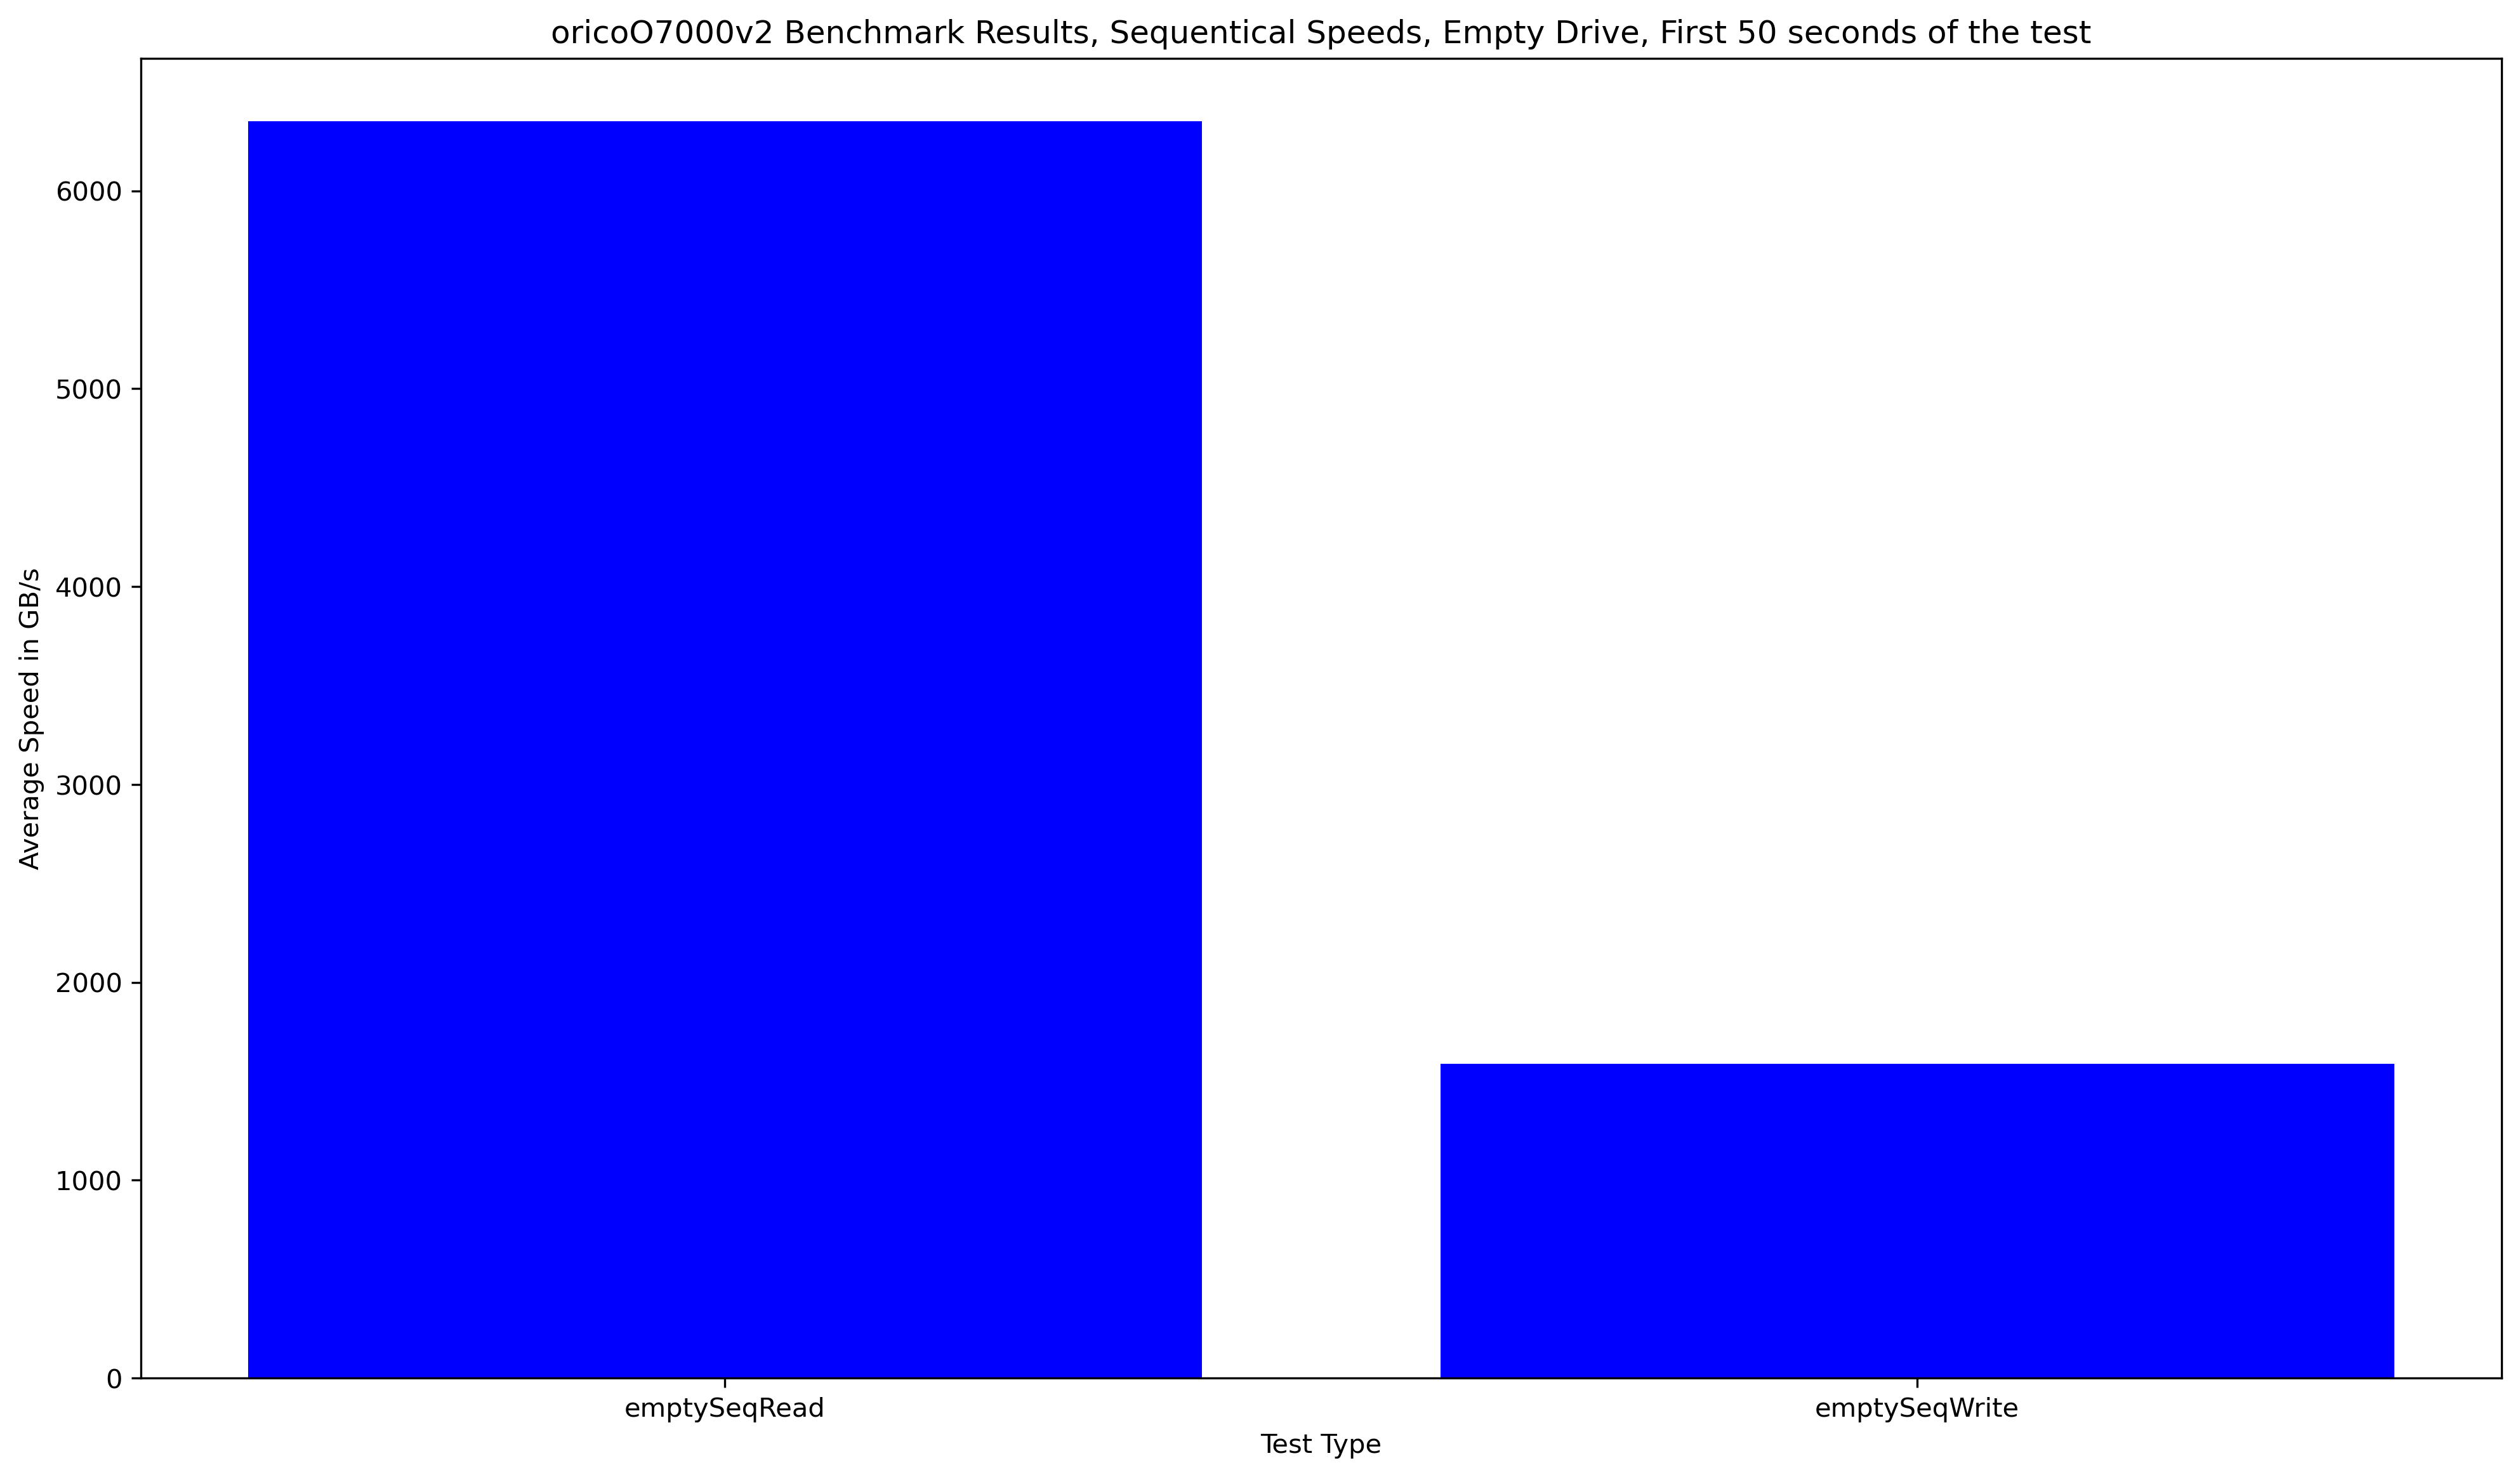

In [160]:
#graphy all speeds of all tests on a single drive, avg speed output


selectedDrive = 'oricoO7000v2'
selectedTests = ["emptySeqRead", "emptySeqWrite"]

selectedResults = []

for i in selectedTests:
    testVal = perfTableHead[selectedDrive][i]
    selectedResults.append(testVal)

print(type(selectedResults))
print(type(selectedTests))

plt.figure(figsize=(16, 9), dpi=300)
plt.bar(selectedTests, selectedResults, color='blue')

plt.title(f"{selectedDrive} Benchmark Results, Sequentical Speeds, Empty Drive, First 50 seconds of the test")
plt.ylabel("Average Speed in GB/s")
plt.xlabel("Test Type")
plt.show()

#plt.figure(figsize=(30,18),dpi=100)
#plt.bar(selectedTests, selectedResults)
#plt.title("Orico O7000v2 Benchmark Results, All Tests")

#plt.rcParams.update({'font.size':22})

<class 'list'>
<class 'list'>


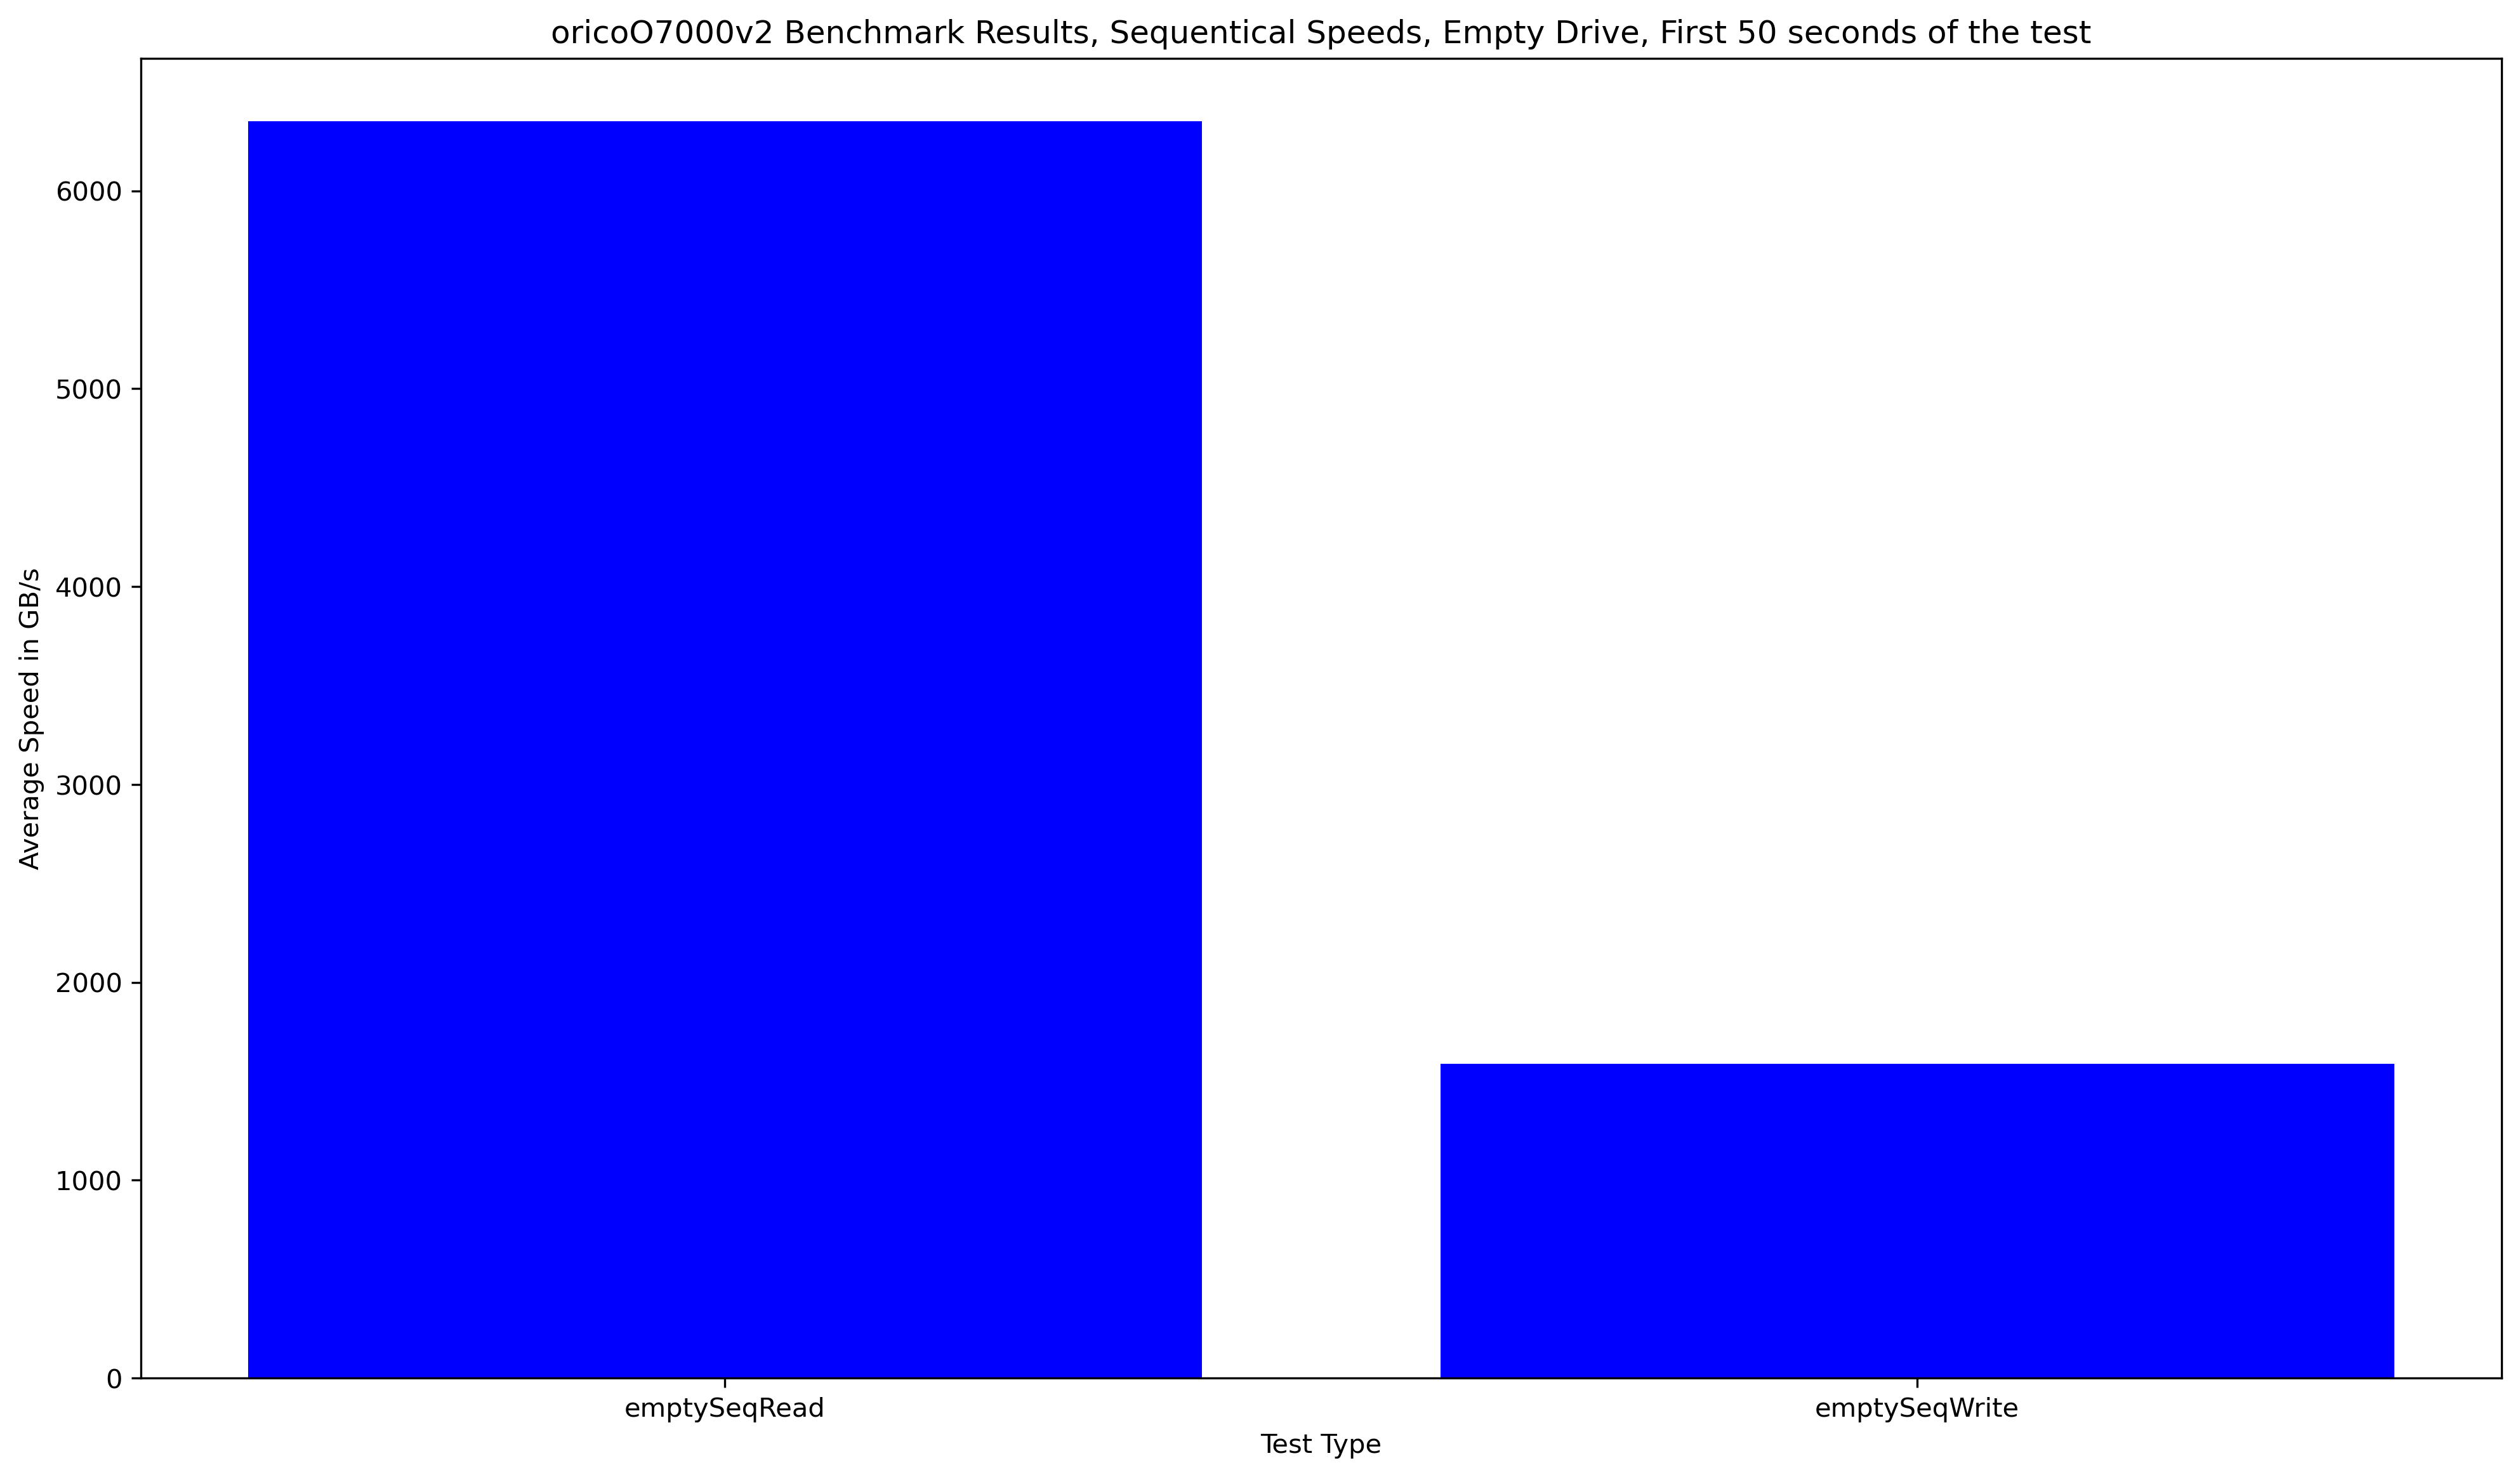

In [ ]:
selectedDrive = 'oricoO7000v2'
selectedTests = ["emptySeqRead", "emptySeqWrite"]

selectedResults = []

for i in selectedTests:
    testVal = perfTableHead[selectedDrive][i]
    selectedResults.append(testVal)

print(type(selectedResults))
print(type(selectedTests))

plt.figure(figsize=(16, 9), dpi=300)
plt.bar(selectedTests, selectedResults, color='blue')

plt.title(f"{selectedDrive} Benchmark Results, Sequentical Speeds, Empty Drive, First 50 seconds of the test")
plt.ylabel("Average Speed in GB/s")
plt.xlabel("Test Type")
plt.show()

[[714.207, 716.985, 254.58, 63.189, 590.536], [372.295, 493.348, 44.201, 20.927, 547.859]]


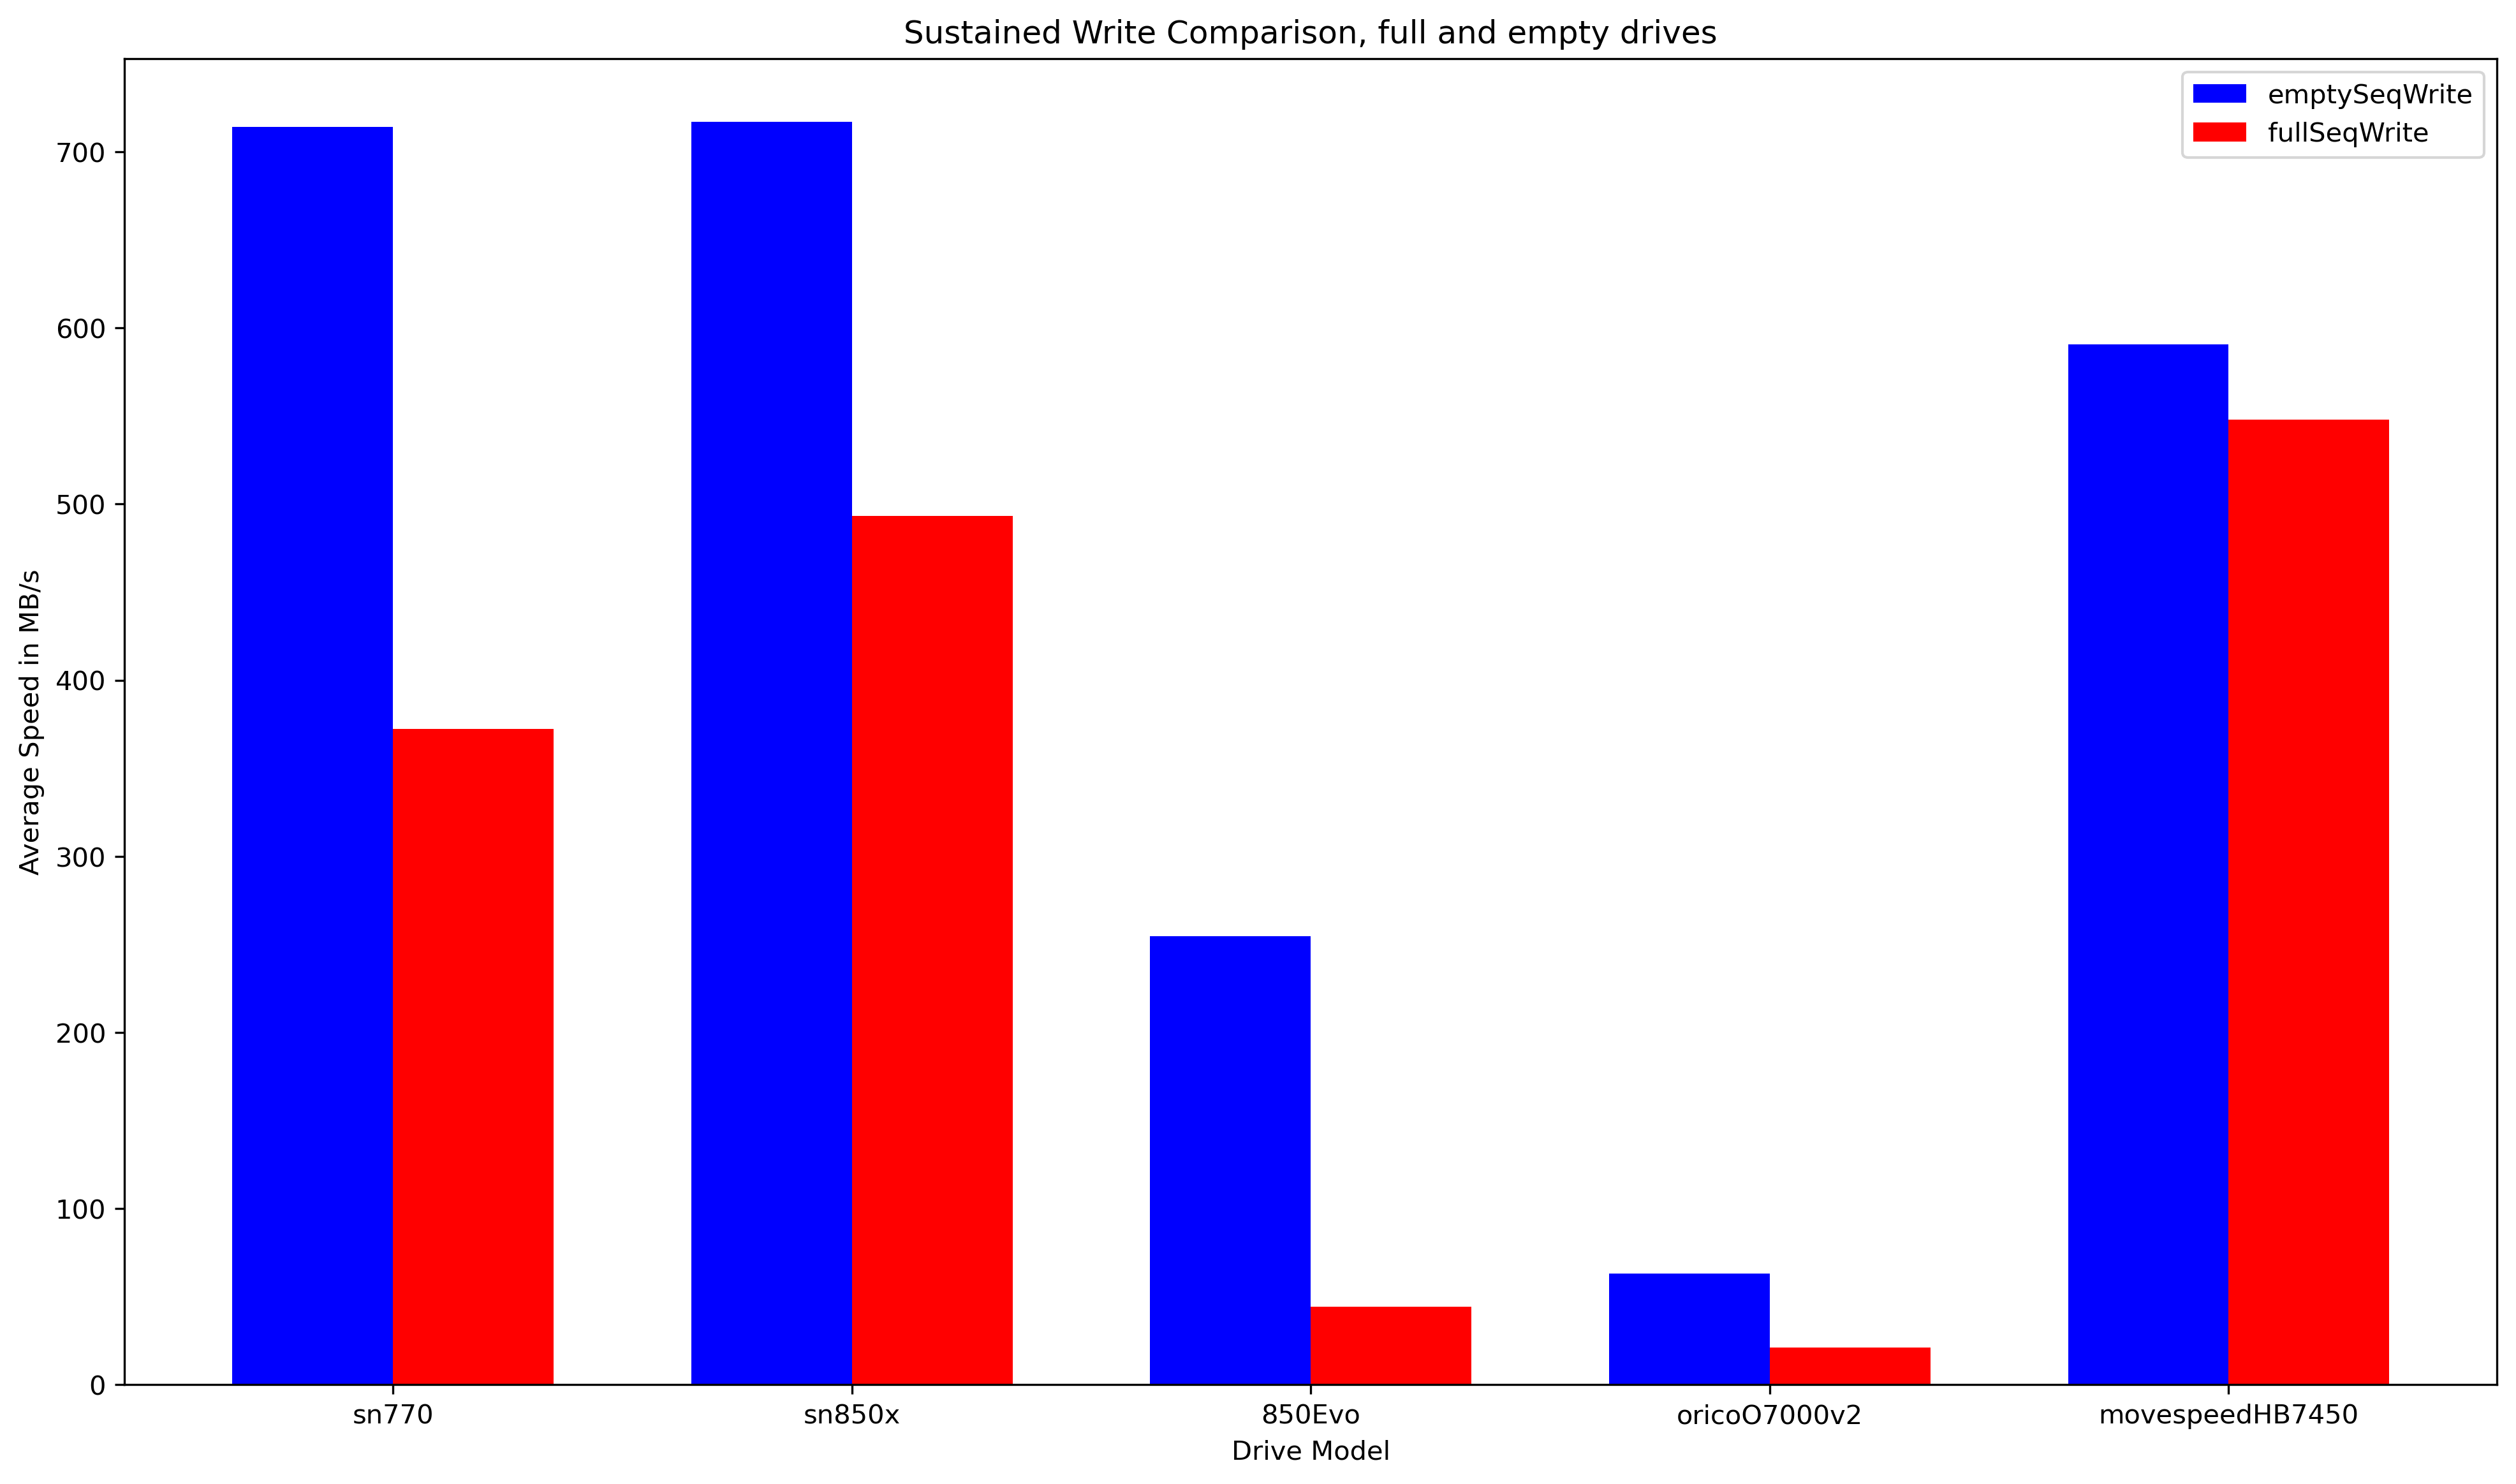

In [198]:
# sustained write comparison

selectedDrives = ['sn770', 'sn850x', '850Evo', 'oricoO7000v2', 'movespeedHB7450']
selectedTests = ['emptySeqWrite', 'fullSeqWrite']

selectedResults = []

for j in selectedTests:
    tempResults = []
    for i in selectedDrives:
        testVal = perfTable[i][j]
        tempResults.append(testVal)
    selectedResults.append(tempResults)

print(selectedResults)

bar_width = 0.35
index = np.arange(len(selectedDrives))

plt.figure(figsize=(16, 9), dpi=300)
plt.bar(index, selectedResults[0], bar_width, color='blue', label=selectedTests[0])
plt.bar(index + bar_width, selectedResults[1], bar_width, color='red', label=selectedTests[1])

plt.xlabel('Drive Model')
plt.ylabel('Average Speed in MB/s')
plt.title('Sustained Write Comparison, full and empty drives')
plt.xticks(index + bar_width / 2, selectedDrives)
plt.legend()

plt.show()

In [15]:
emptyFullPairs = {"empty1qdRandRead":"full1qdRandRead","empty1qdRandWrite":"full1qdRandWrite","empty8qdRandRead":"full8qdRandRead","emptyqd16Mixed":"fullqd16Mixed","emptyqd1Mixed":"fullqd1Mixed","emptySeqRead":"fullSeqRead"}

emptyFullSpeedDrop = {}

for i in drives:
    tempDict = {}
    for j in emptyFullPairs:
        #print(i,j)
        emptySpeed = perfTable.at[perfTable.index[perfTable['driveModel'] == i][0],j]
        fullSpeed = perfTable.at[perfTable.index[perfTable['driveModel'] == i][0],emptyFullPairs[j]]
        speedDrop = fullSpeed/emptySpeed 
        tempDict[j] = speedDrop
    #print(i)
    #print(tempDict)
    emptyFullSpeedDrop[i] = tempDict


#print(emptyFullSpeedDrop)
fullEmptyDf = pd.DataFrame.from_dict(emptyFullSpeedDrop)        
print(fullEmptyDf['affioIncludedM2'].mean().round(2))
fullEmptyDf
newRow= []
for i in fullEmptyDf.columns:
    newRow.append(fullEmptyDf[i].mean().round(2))
print(newRow)
fullEmptyDf.loc["average"] = newRow
fullEmptyDf = pd.DataFrame(fullEmptyDf,columns=drivesCompare)
fullEmptyDf

0.26
[0.58, 0.26, 0.43, 1.86, 0.25, 0.51, 0.99, 0.33, 0.19, 1.01, 0.34, 0.39, 0.39, 0.9]


movespeedHB7450     sn770    sn850x    850Evo  \
empty1qdRandRead          0.033309  0.137882  0.134525  0.582497   
empty1qdRandWrite         0.977789  0.473442  0.470495  0.411980   
empty8qdRandRead          0.135980  0.077954  0.078816  0.801138   
emptyqd16Mixed            0.561427  0.270899  0.260171  0.338692   
emptyqd1Mixed             0.621074  0.607412  0.626376  0.397547   
emptySeqRead              0.736208  0.793543  0.793761  0.952230   
average                   0.510000  0.390000  0.390000  0.580000   

                   oricoO7000v2  rms200  
empty1qdRandRead       0.059272     NaN  
empty1qdRandWrite      0.191926     NaN  
empty8qdRandRead       0.075108     NaN  
emptyqd16Mixed         0.073342     NaN  
emptyqd1Mixed          0.064495     NaN  
emptySeqRead           0.702384     NaN  
average                0.190000     NaN

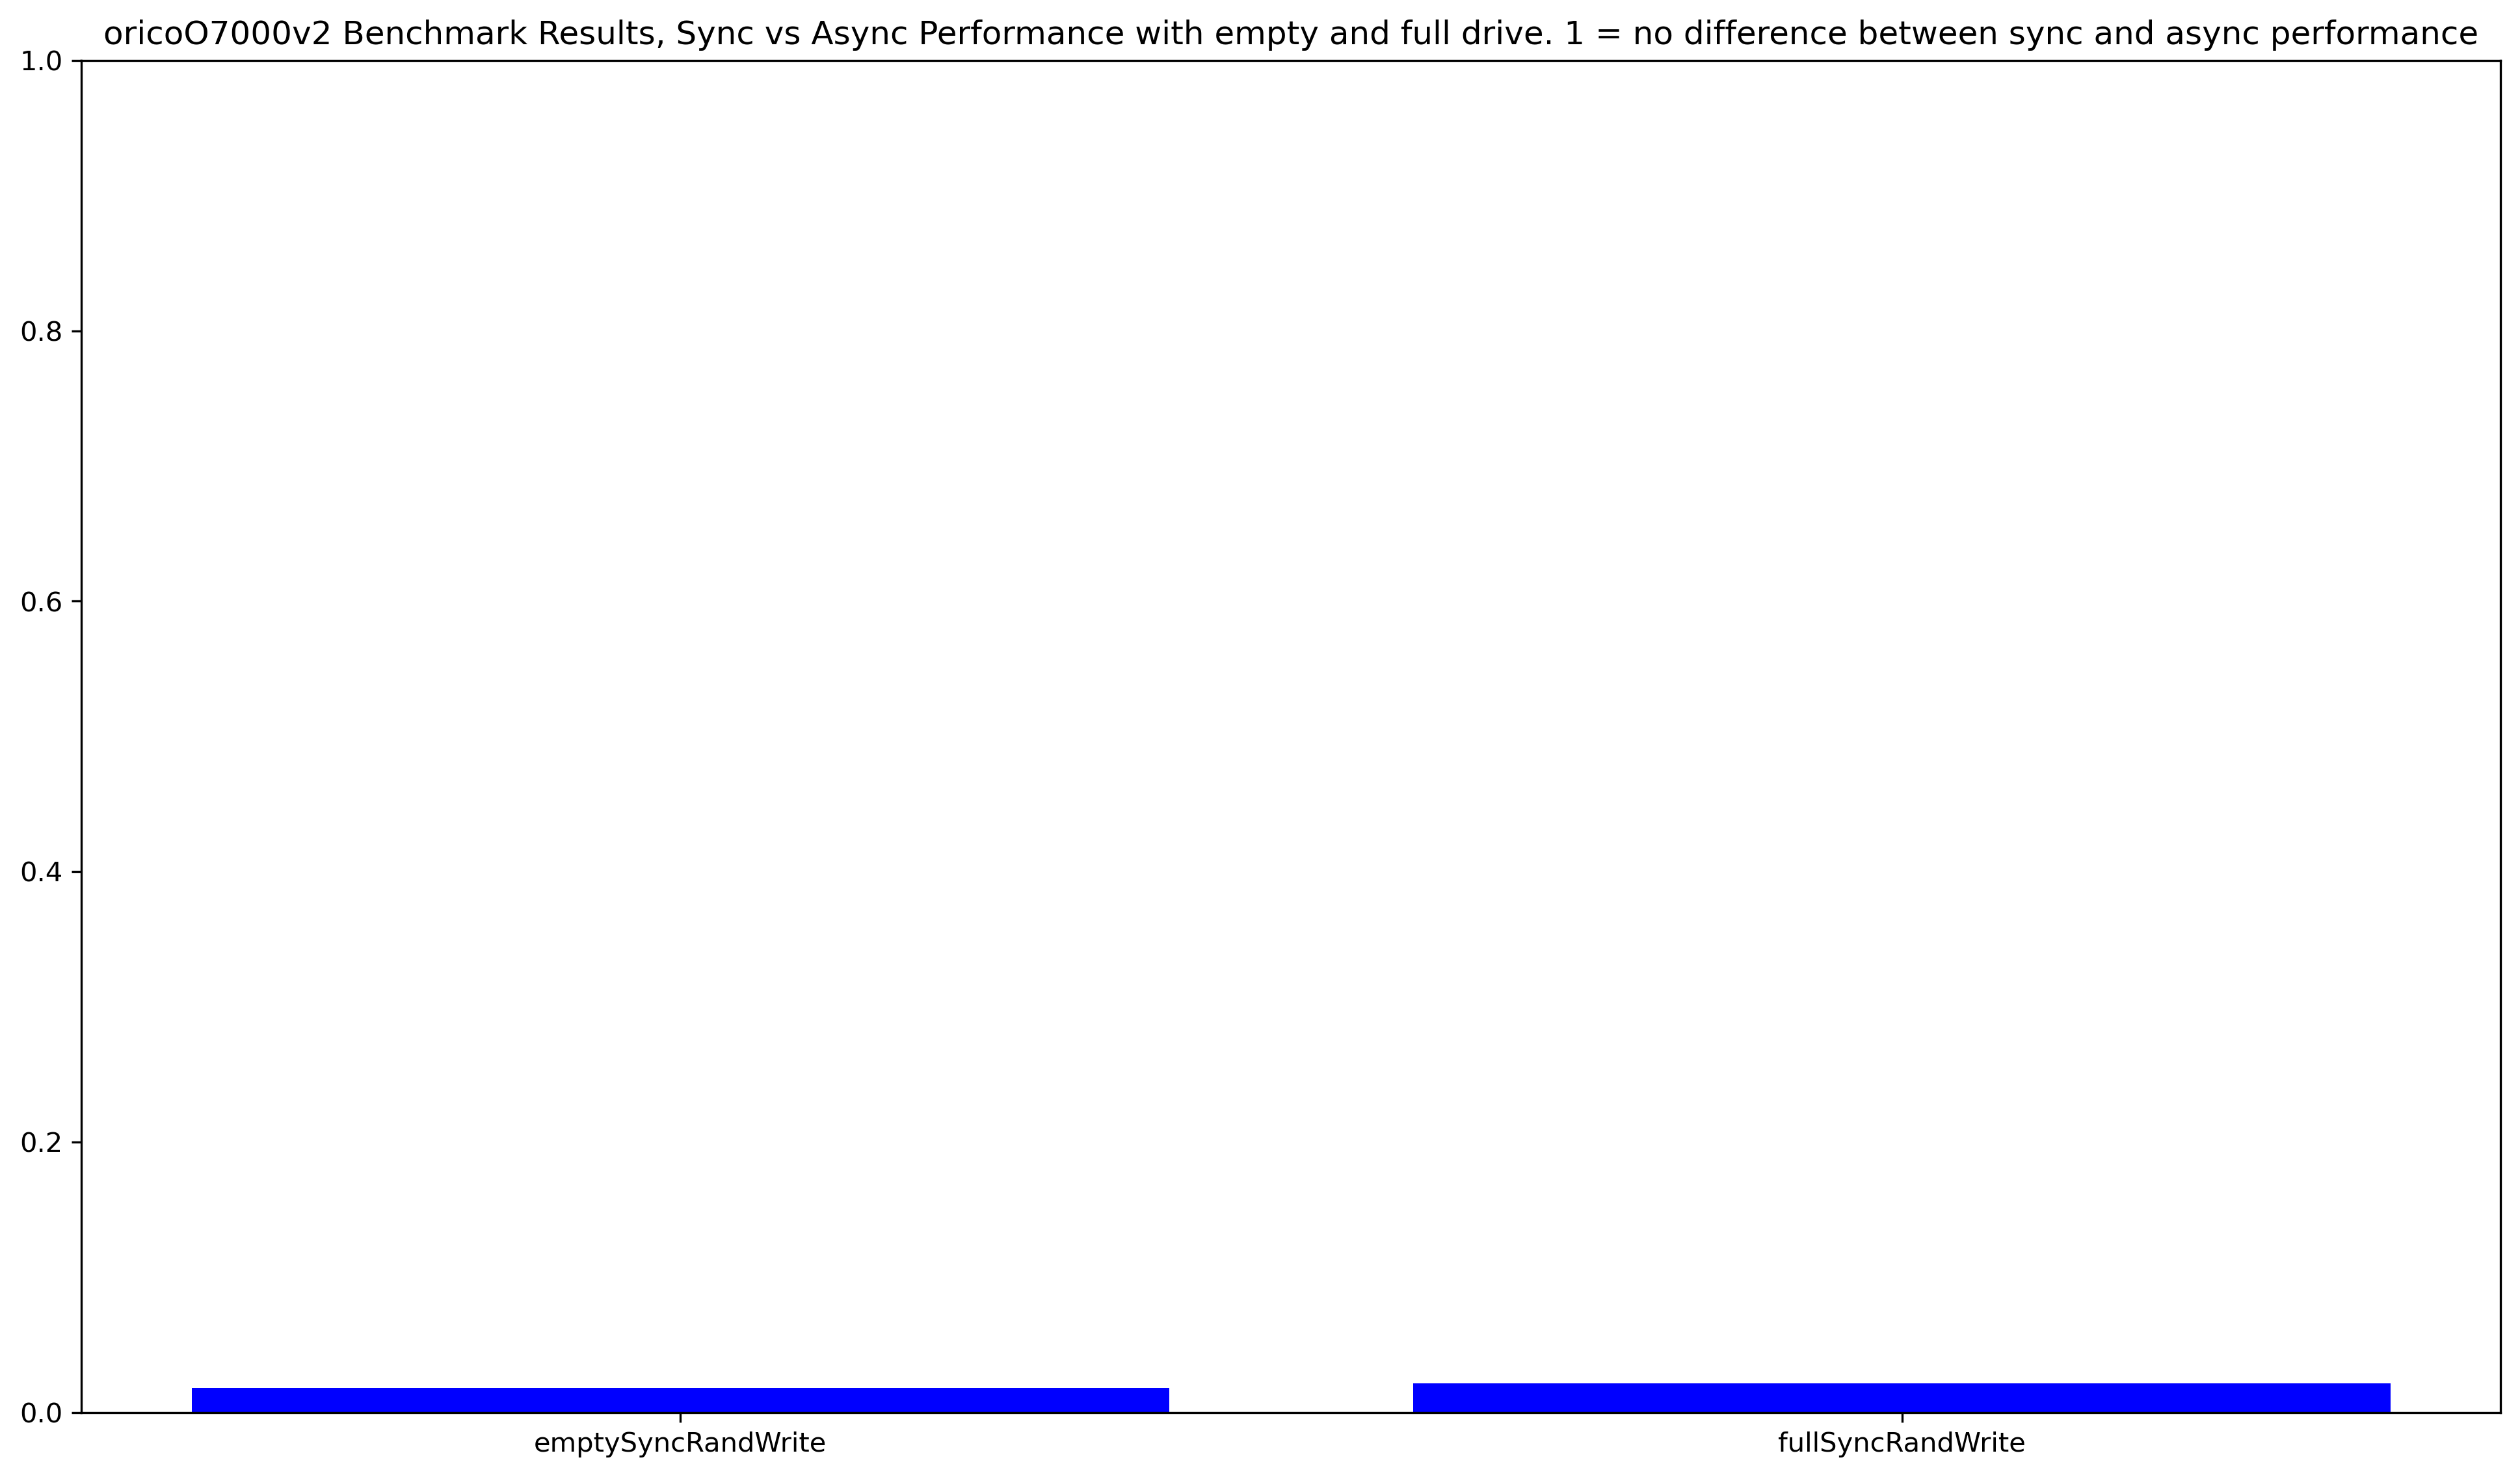

In [208]:
#SYNC TESTS
# emptySyncRandWrite = empty1qdRandWrite with sync
# fullSyncRandWrite = full1qdRandWrite with sync, but error with test that was fixed on 2024-02-21
#

selectedDrive = 'oricoO7000v2'
syncTests = ["emptySyncRandWrite", "fullSyncRandWrite"]
asyncTests = ["empty1qdRandWrite", "full1qdRandWrite"]

syncPerfDiff = []

for i in syncTests:
    syncPerfDiff.append(perfTable[selectedDrive][i]/perfTable[selectedDrive][asyncTests[syncTests.index(i)]])

syncResults = []

for i in syncTests:
    testVal = perfTable[selectedDrive][i]
    syncResults.append(testVal)

asyncResults = []

for i in asyncTests:
    testVal = perfTable[selectedDrive][i]
    asyncResults.append(testVal)

plt.figure(figsize=(16, 9), dpi=300)
plt.bar(syncTests, syncPerfDiff, color='blue')
plt.ylim(0, 1)
plt.title(f"{selectedDrive} Benchmark Results, Sync vs Async Performance with empty and full drive. 1 = no difference between sync and async performance") 
plt.show()

204.517
sn770 0.1209092642665402 0.15207535088353455
sn850x 0.12151024832286857 1.2396953219044455
850Evo 0.03749409939982467 1.4721324221467447
oricoO7000v2 0.017984364436894384 0.02167630057803468
movespeedHB7450 0.01638842582525992 1.0017790223613228


Text(0.5, 1.0, 'Sync vs Async Performance Comparison of various drives, average of empty and full performance')

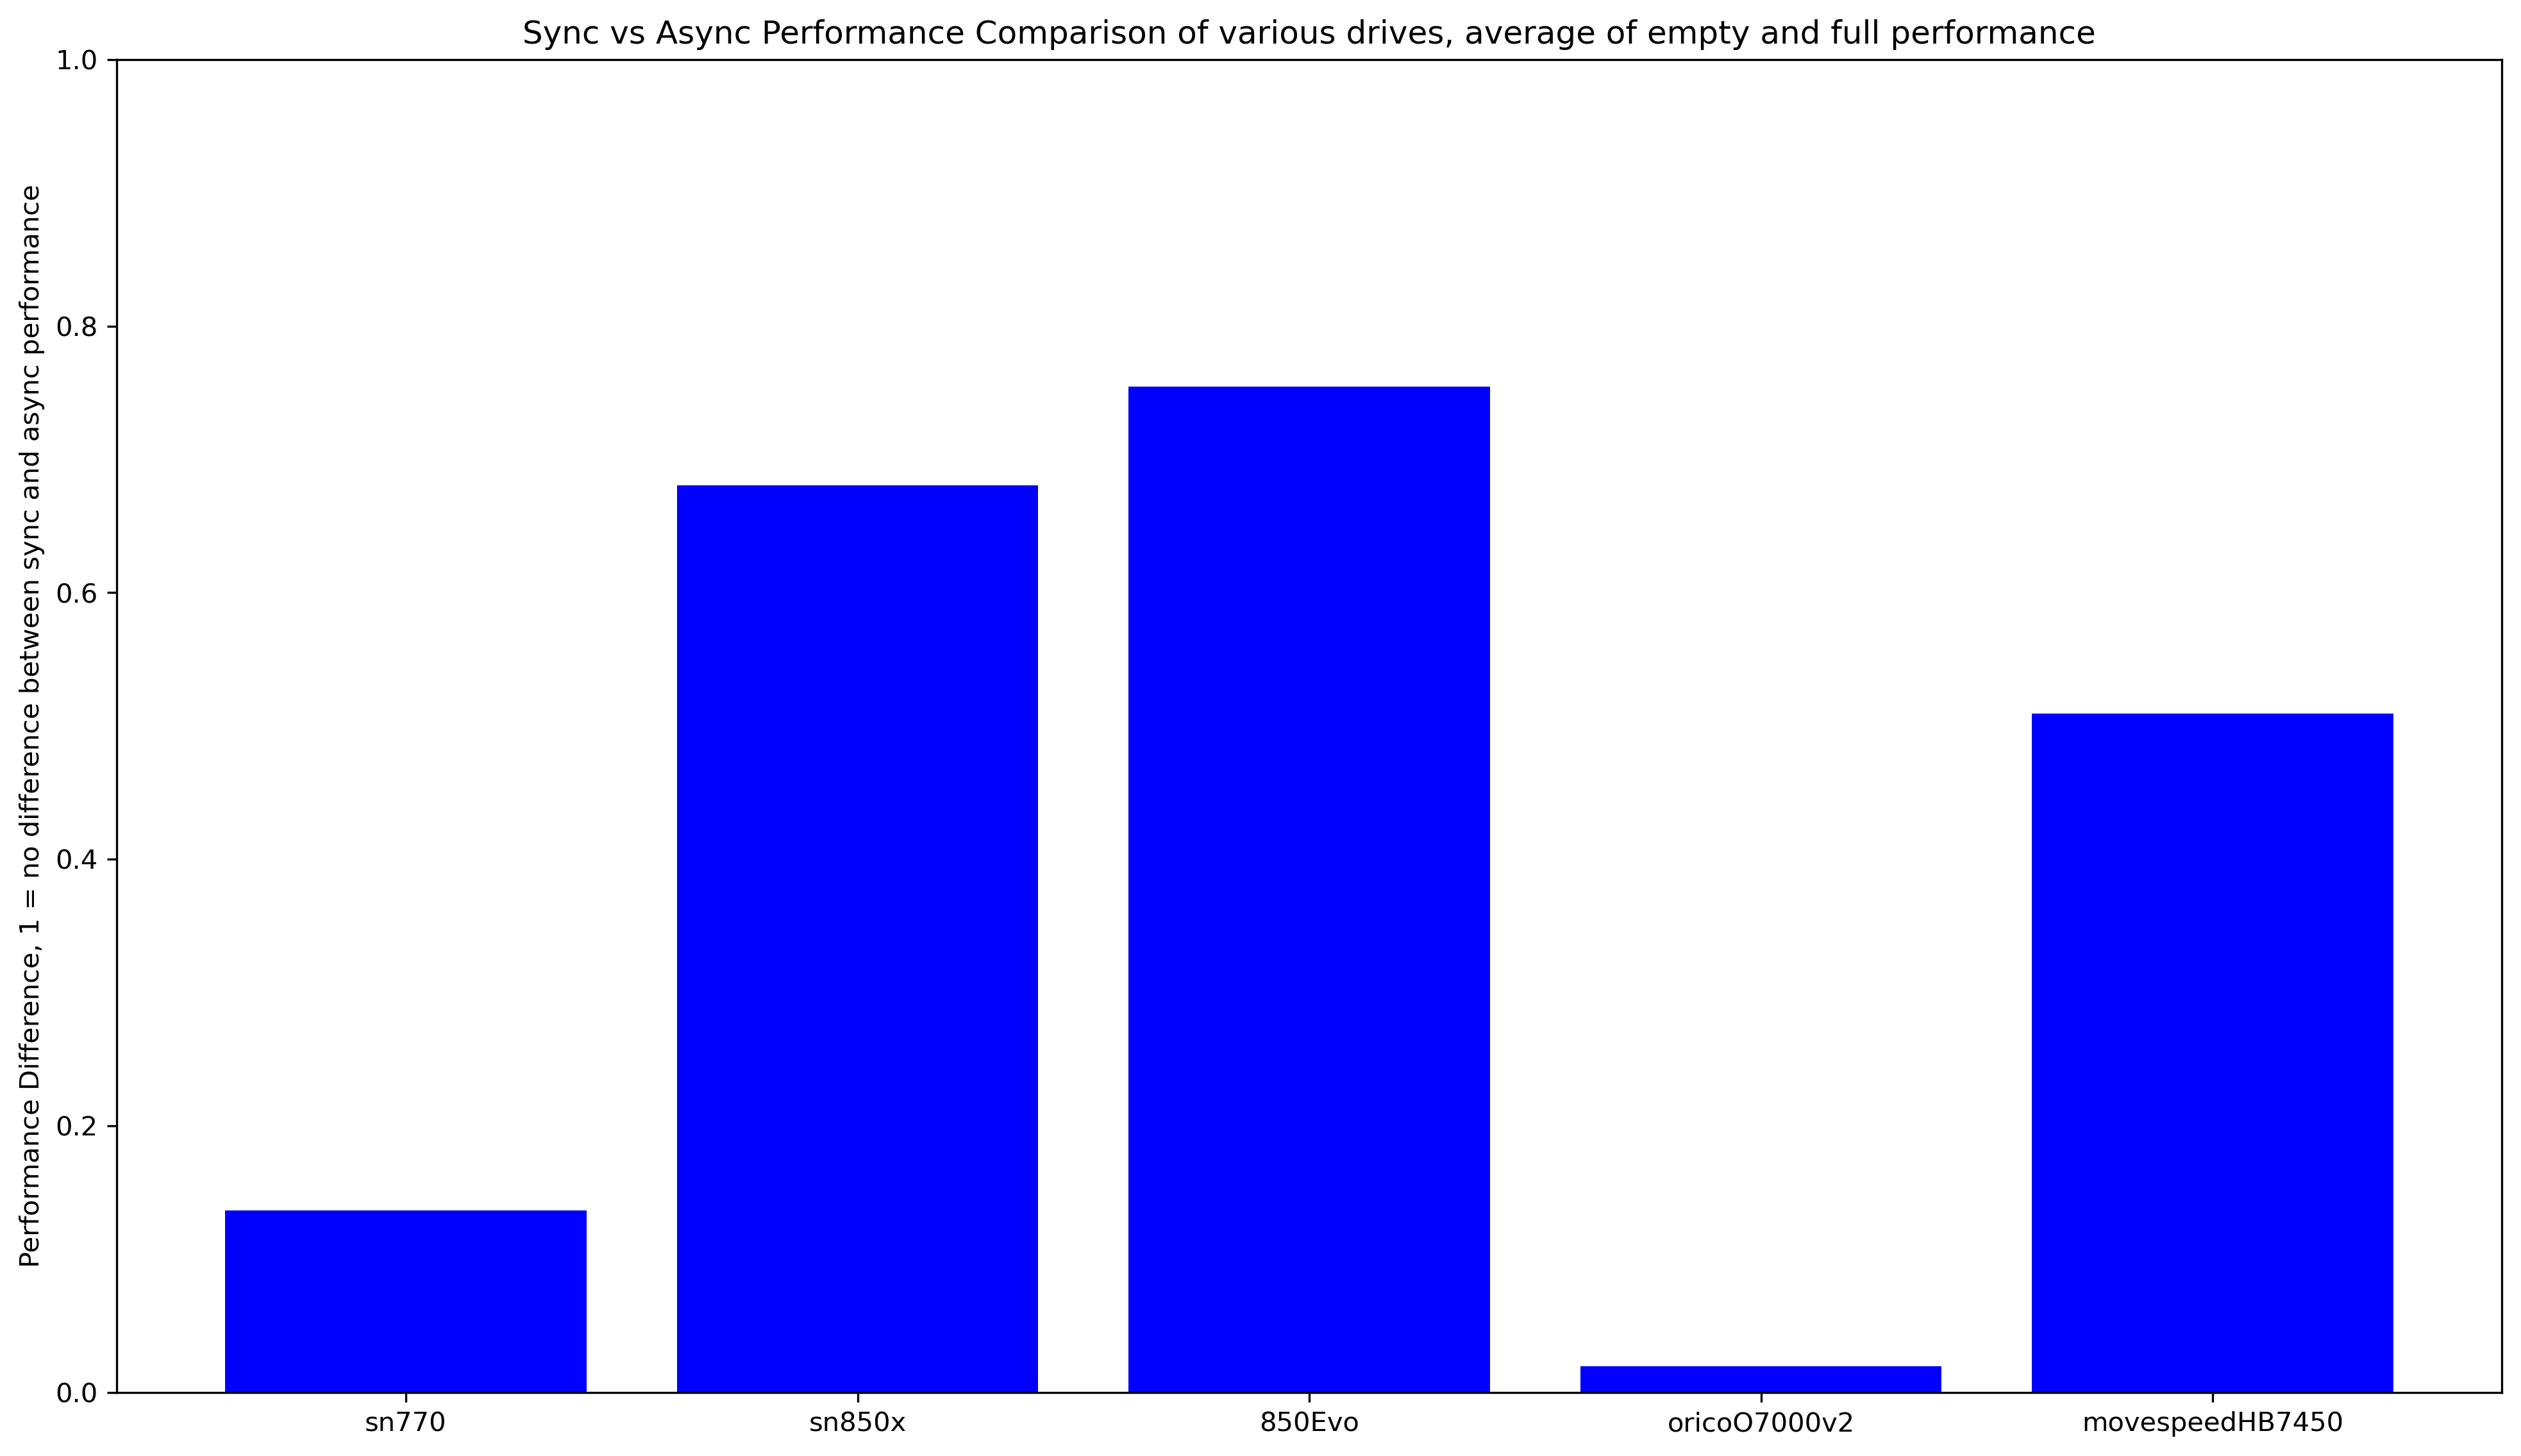

In [223]:
#sync comparison for all drives
#SYNC TESTS
# emptySyncRandWrite = empty1qdRandWrite with sync
# fullSyncRandWrite = full1qdRandWrite with sync, but error with test that was fixed on 2024-02-21
#

drives = ['sn770', 'sn850x', '850Evo', 'oricoO7000v2', 'movespeedHB7450']

syncTests = ["emptySyncRandWrite", "fullSyncRandWrite"]

syncPerfCompare = {}

print(perfTable['sn770']['empty1qdRandWrite'])
for i in drives:
    syncPerfDiffEmpty = float(perfTable[i][syncTests[0]])/float(perfTable[i]["empty1qdRandWrite"])
    sincDiffFull = float(perfTable[i][syncTests[1]])/float(perfTable[i]["full1qdRandWrite"])
    print(i,syncPerfDiffEmpty,sincDiffFull)
    avgsyncPerfDiff = (syncPerfDiffEmpty + sincDiffFull)/2
    avgsyncPerfDiff = round(avgsyncPerfDiff,4)
    syncPerfCompare[i] = avgsyncPerfDiff


plt.figure(figsize=(16, 9), dpi=300)
plt.bar(syncPerfCompare.keys(), syncPerfCompare.values(), color='blue')
plt.ylim(0, 1)
plt.ylabel("Performance Difference, 1 = no difference between sync and async performance")
plt.title("Sync vs Async Performance Comparison of various drives, average of empty and full performance")



[[6035.862, 714.207], [6033.262, 716.985], [541.636, 254.58], [6360.899, 63.189], [6287.799, 590.536]]


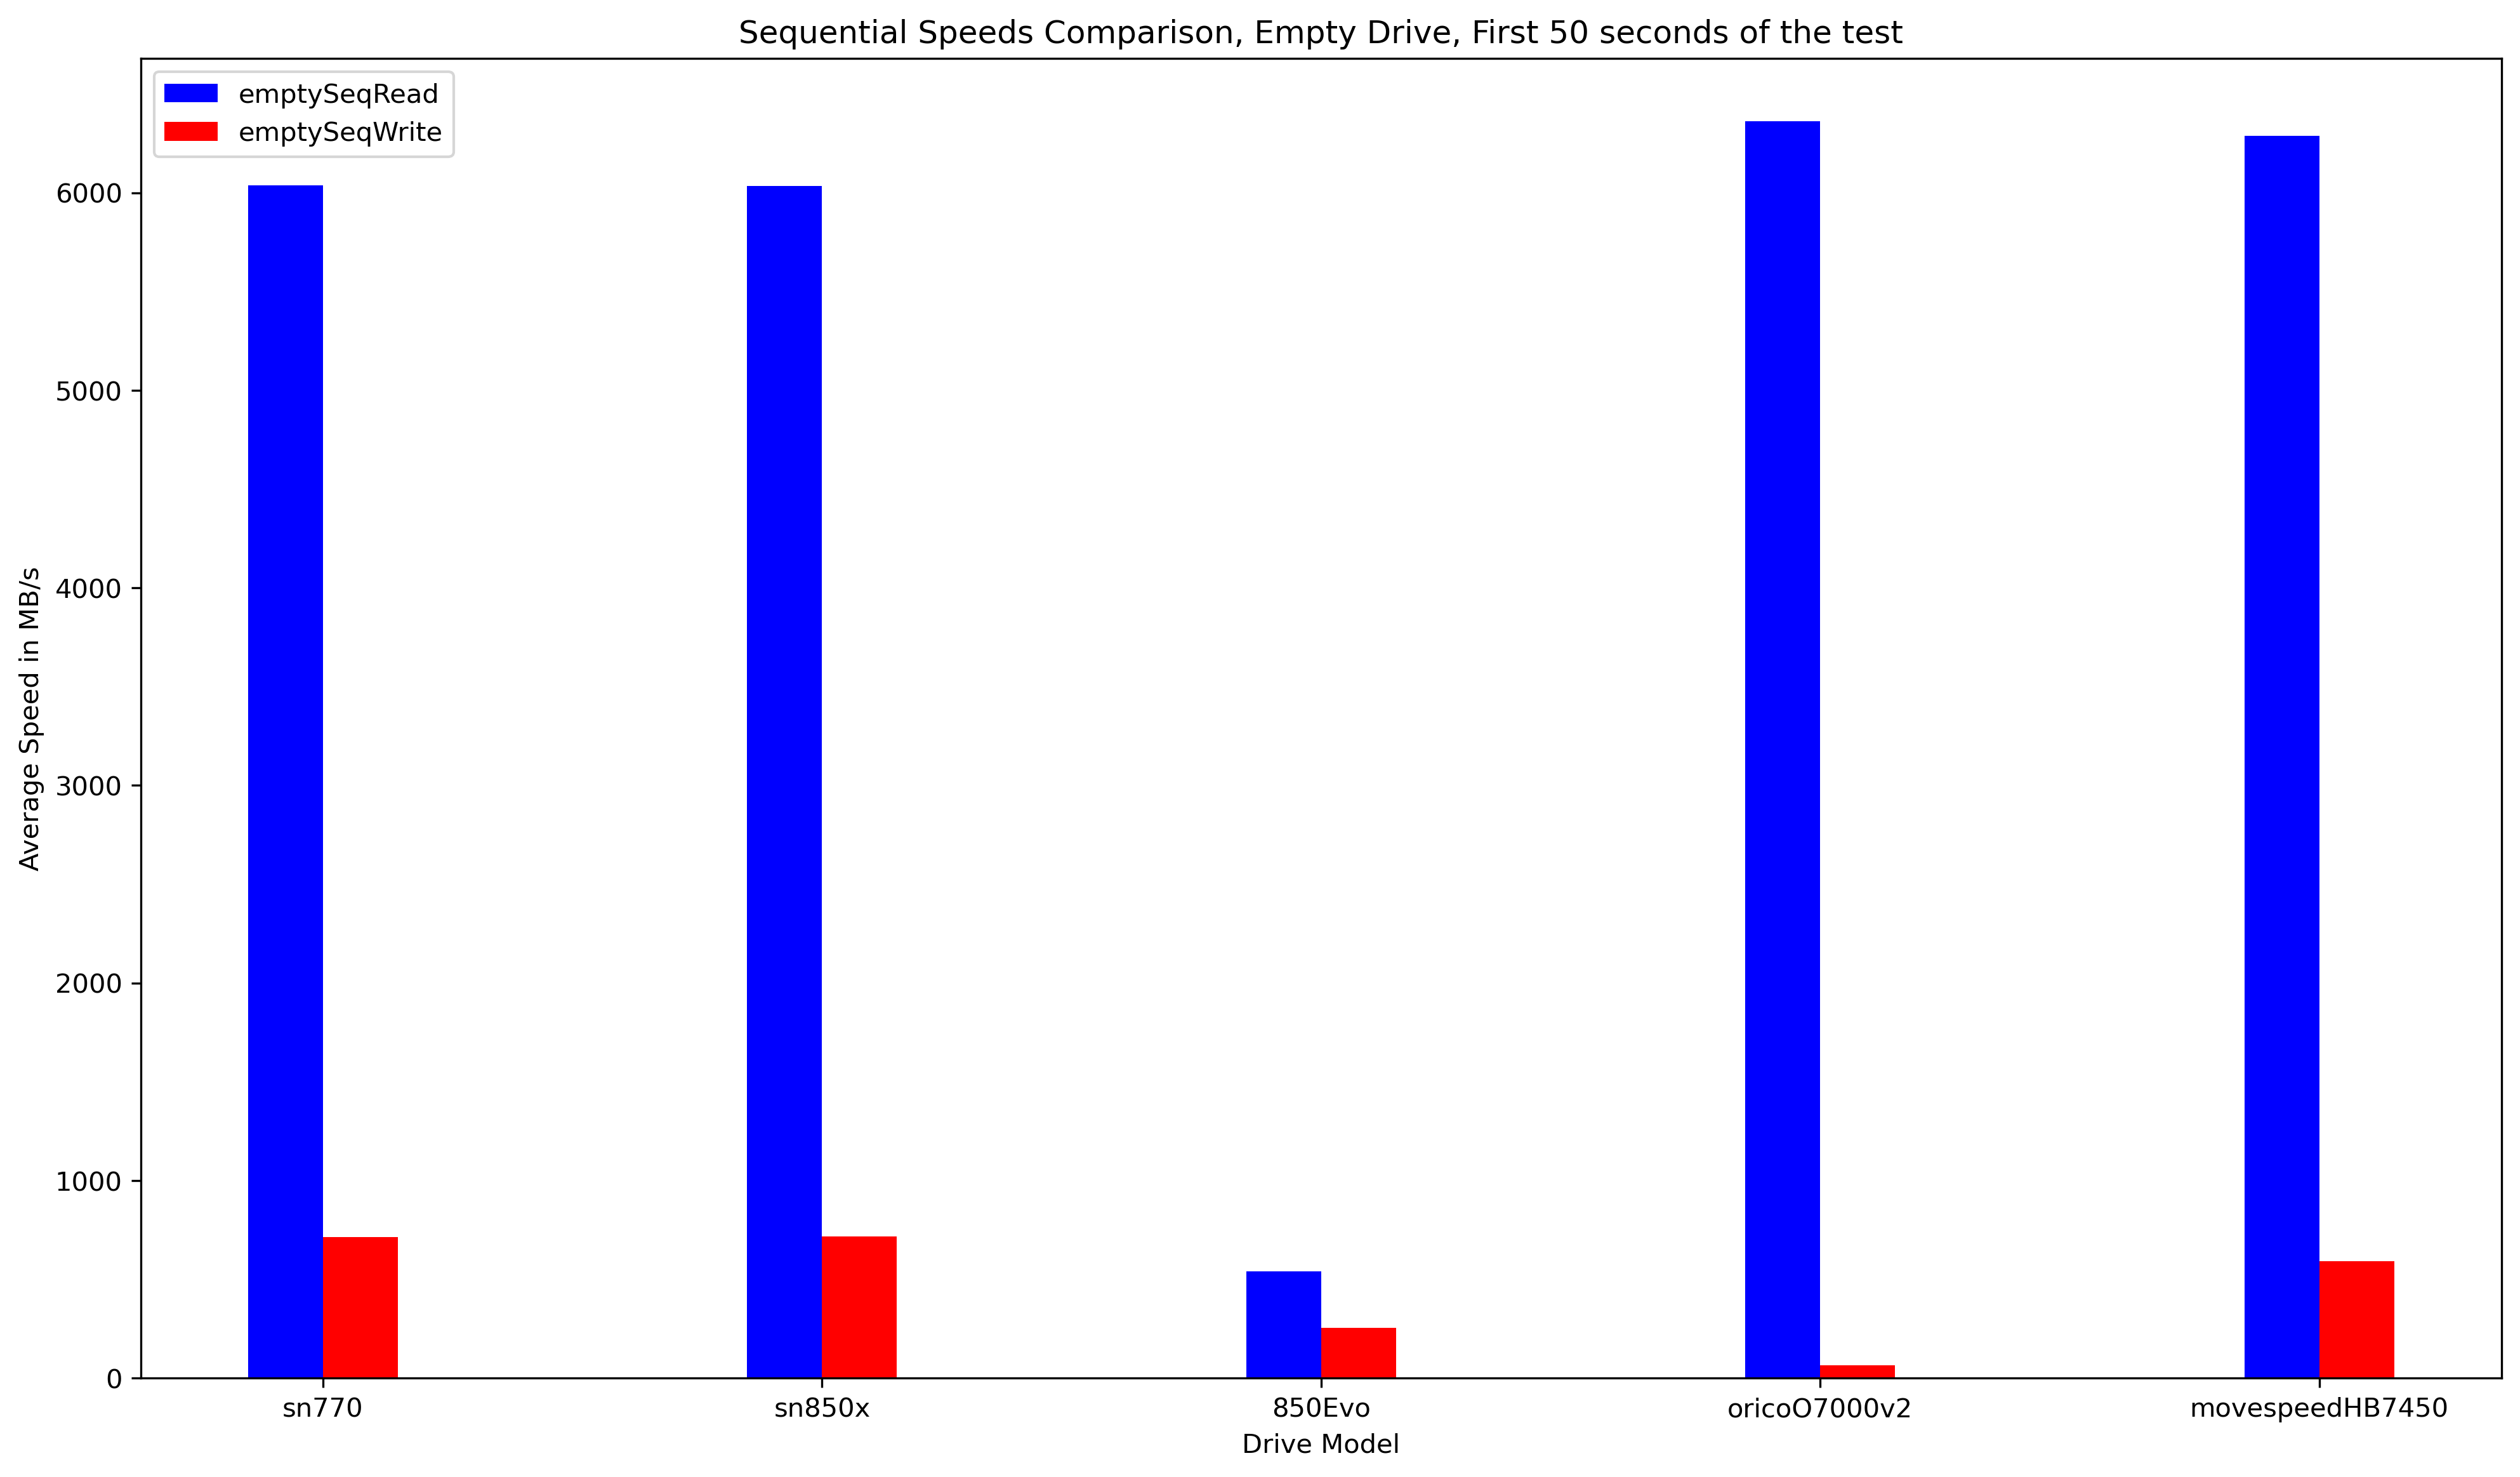

In [ ]:
selectedDrives = ['sn770', 'sn850x', '850Evo', 'oricoO7000v2', 'movespeedHB7450']
selectedTests = ["emptySeqRead", "emptySeqWrite"]

selectedResults = []

for i in selectedDrives:
    tempResults = []
    for j in selectedTests:
        testVal = perfTable[i][j]
        tempResults.append(testVal)
    selectedResults.append(tempResults)

print(selectedResults)

bar_width = 0.15
index = np.arange(len(selectedDrives))

plt.figure(figsize=(16, 9), dpi=300)
plt.bar(index, [result[0] for result in selectedResults], bar_width, color='blue', label=selectedTests[0])
plt.bar(index + bar_width, [result[1] for result in selectedResults], bar_width, color='red', label=selectedTests[1])

plt.xlabel('Drive Model')
plt.ylabel('Average Speed in MB/s')
plt.title('Sequential Speeds Comparison, Empty Drive, First 50 seconds of the test')
plt.xticks(index + bar_width / 2, selectedDrives)
plt.legend()

plt.show()


[[6035.093, 1761.252], [6032.176, 1536.139], [539.568, 483.42], [6351.055, 1588.077], [6286.275, 1805.065]]


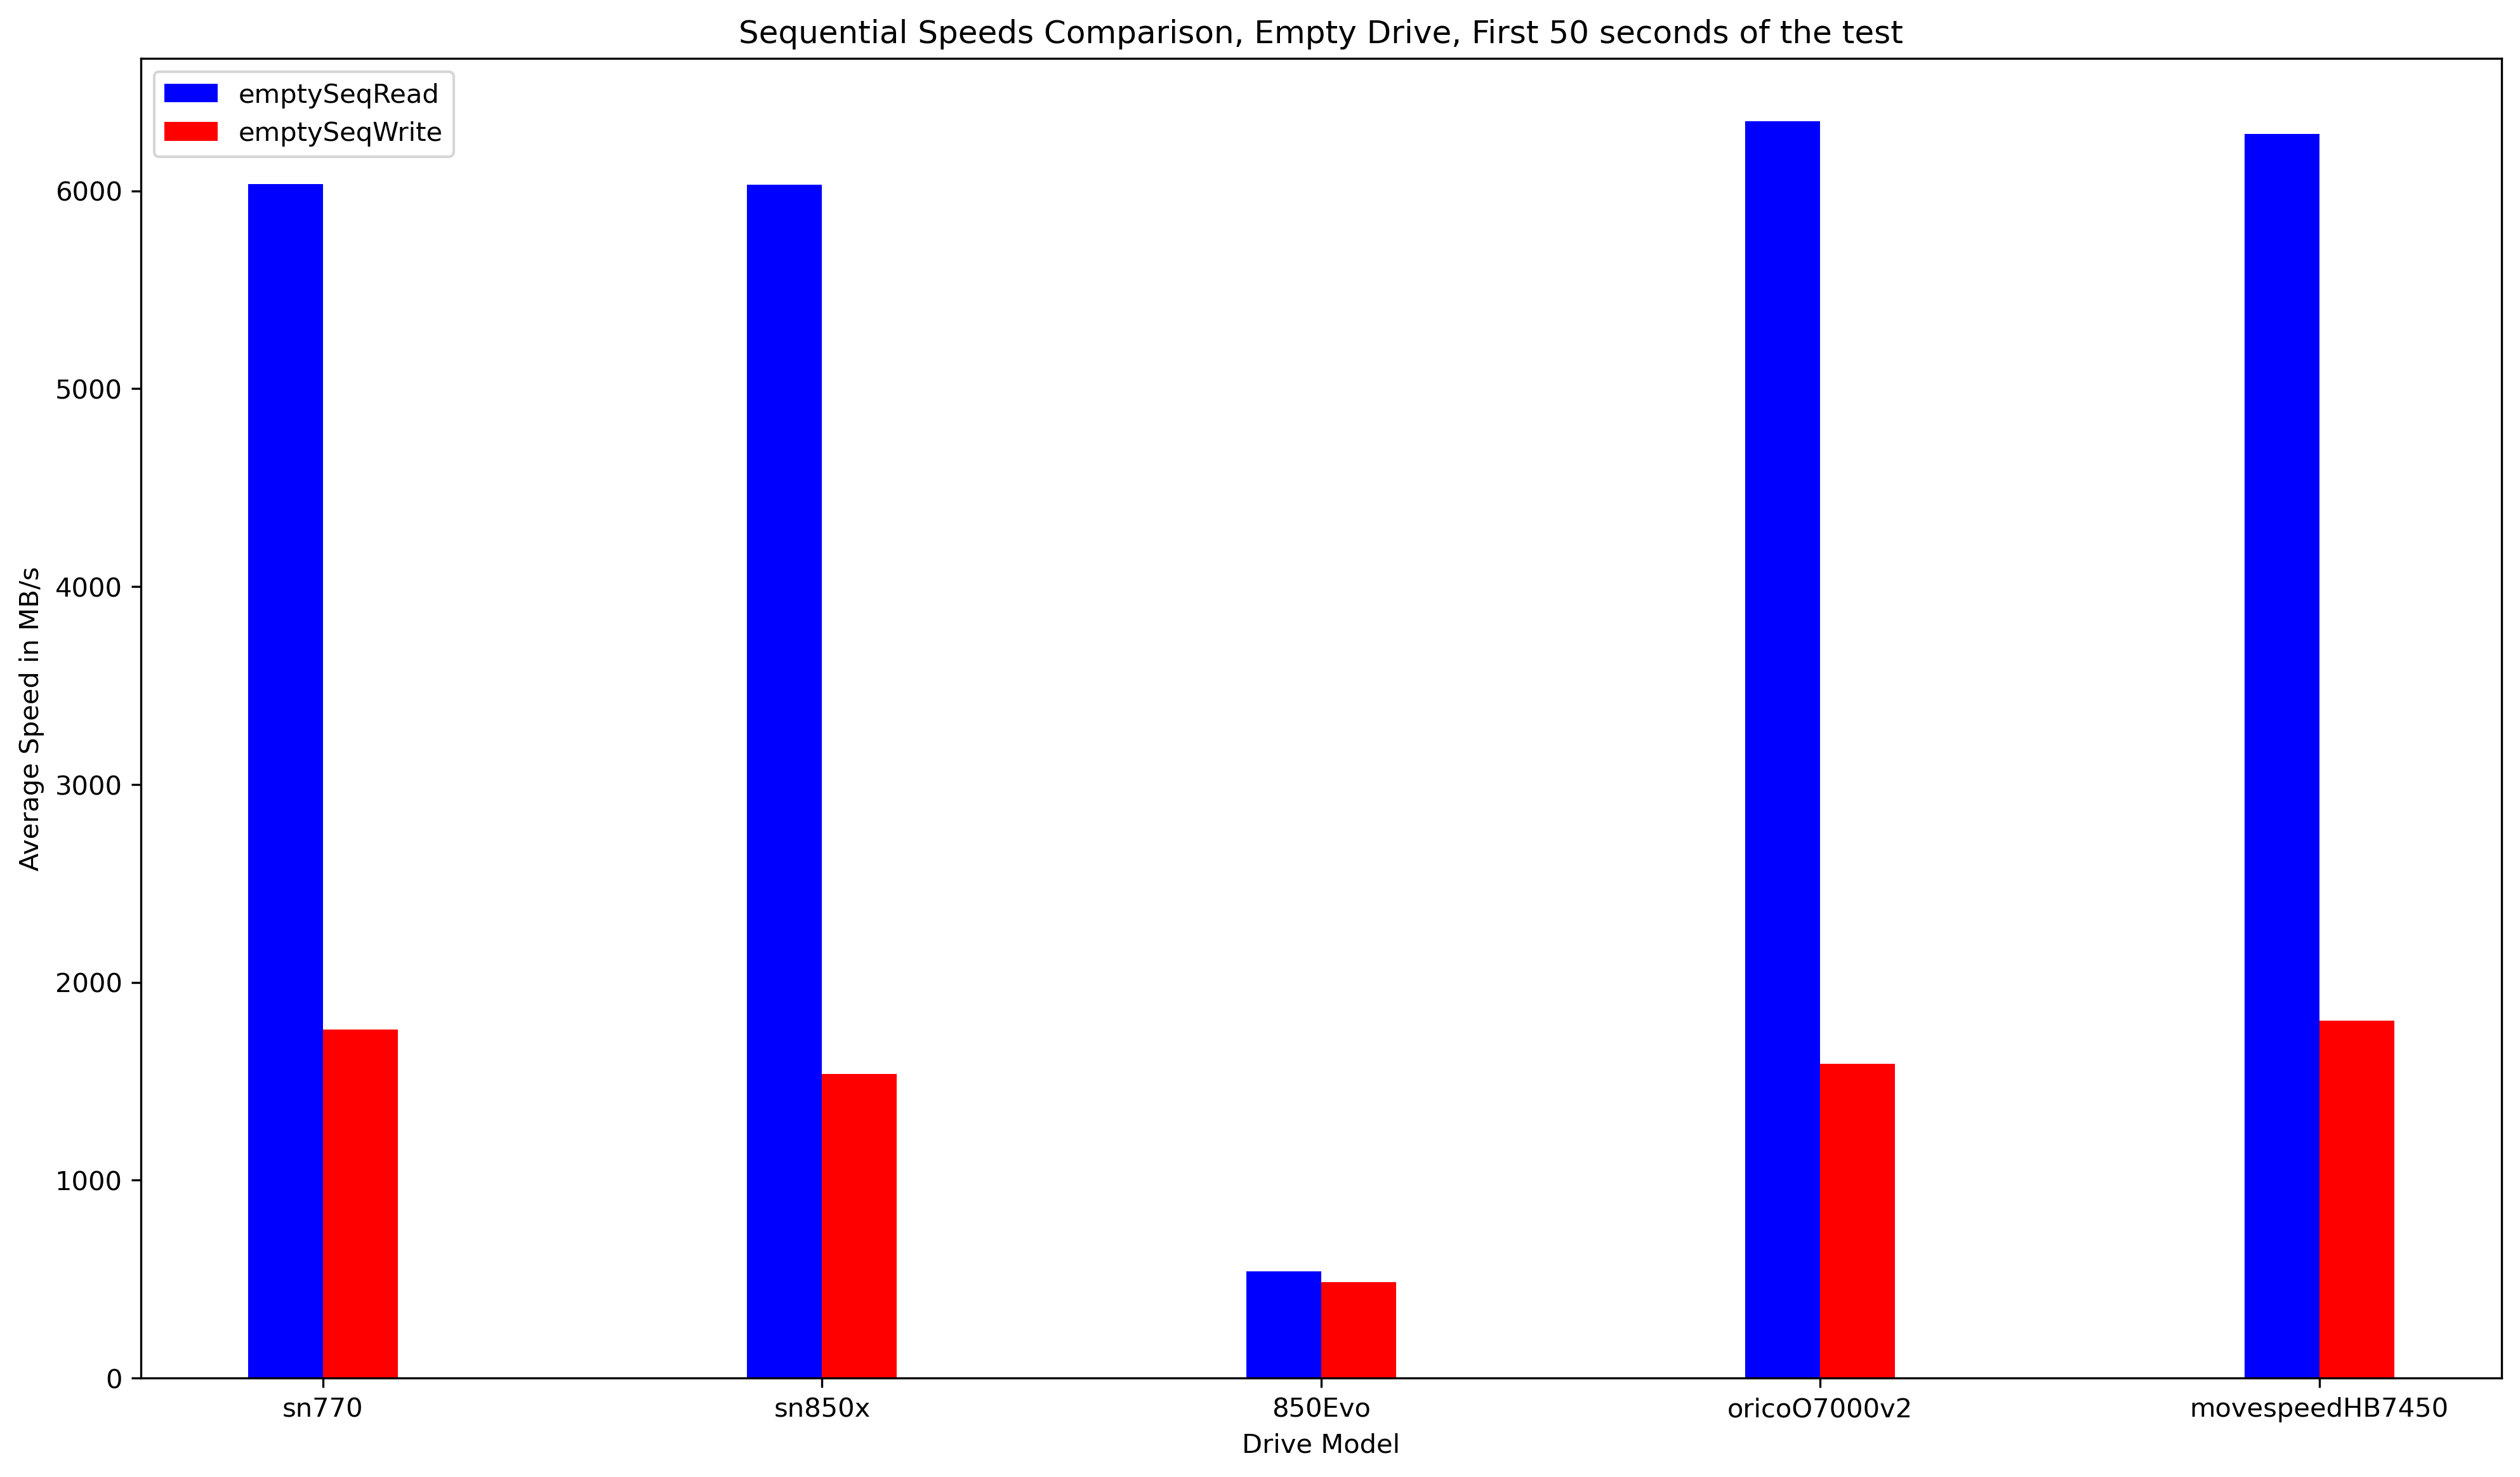

In [170]:
selectedDrives = ['sn770', 'sn850x', '850Evo', 'oricoO7000v2', 'movespeedHB7450']
selectedTests = ["emptySeqRead", "emptySeqWrite"]

selectedResults = []

for i in selectedDrives:
    tempResults = []
    for j in selectedTests:
        testVal = perfTableHead[i][j]
        tempResults.append(testVal)
    selectedResults.append(tempResults)

print(selectedResults)

bar_width = 0.15
index = np.arange(len(selectedDrives))

plt.figure(figsize=(16, 9), dpi=300)
plt.bar(index, [result[0] for result in selectedResults], bar_width, color='blue', label=selectedTests[0])
plt.bar(index + bar_width, [result[1] for result in selectedResults], bar_width, color='red', label=selectedTests[1])

plt.xlabel('Drive Model')
plt.ylabel('Average Speed in MB/s')
plt.title('Sequential Speeds Comparison, Empty Drive, First 50 seconds of the test')
plt.xticks(index + bar_width / 2, selectedDrives)
plt.legend()

plt.show()


In [77]:
fullEmptyDf.loc["average"]

movespeedHB7450    0.51
sn770              0.39
sn850x             0.39
850Evo             0.58
oricoO7000v2       0.19
rms200              NaN
Name: average, dtype: float64

[[33.155, 96.827], [33.385, 96.364], [34.344, 48.874], [23.83, 22.144], [8.893, 121.415]]


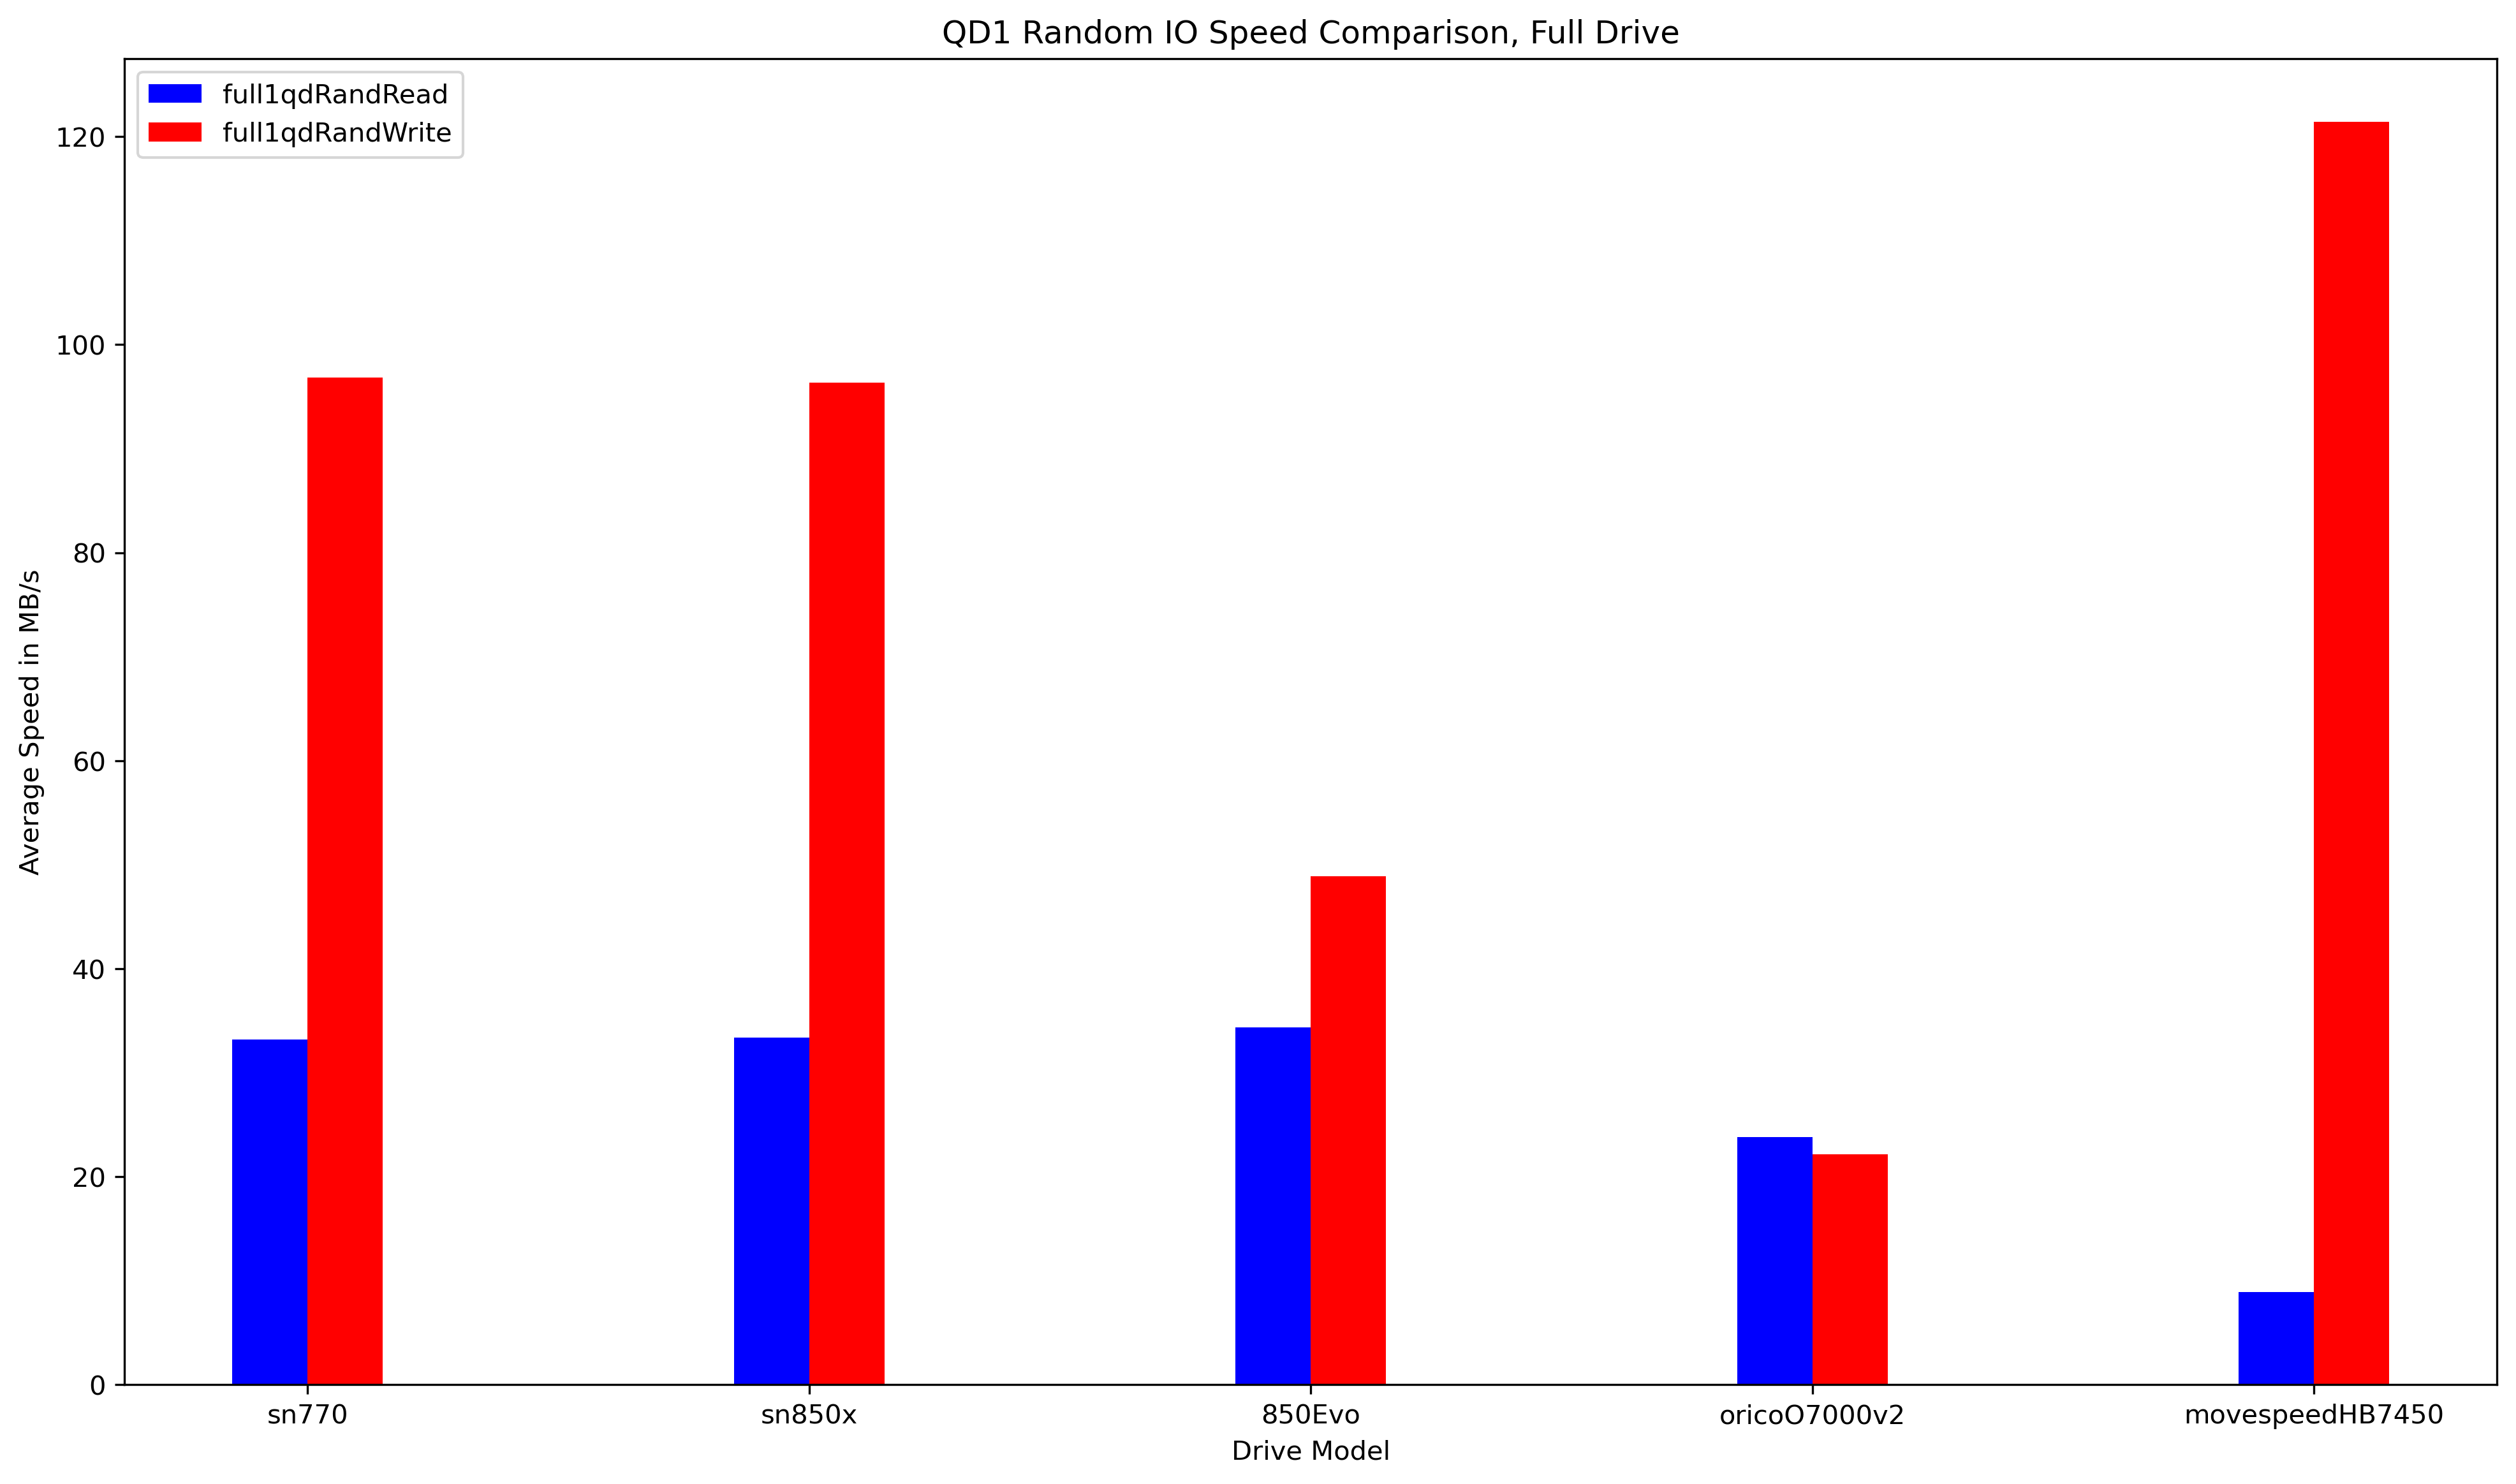

In [175]:
selectedDrives = ['sn770', 'sn850x', '850Evo', 'oricoO7000v2', 'movespeedHB7450']
selectedTests = ["full1qdRandRead", "full1qdRandWrite"]

selectedResults = []

for i in selectedDrives:
    tempResults = []
    for j in selectedTests:
        testVal = perfTable[i][j]
        tempResults.append(testVal)
    selectedResults.append(tempResults)

print(selectedResults)

bar_width = 0.15
index = np.arange(len(selectedDrives))

plt.figure(figsize=(16, 9), dpi=300)
plt.bar(index, [result[0] for result in selectedResults], bar_width, color='blue', label=selectedTests[0])
plt.bar(index + bar_width, [result[1] for result in selectedResults], bar_width, color='red', label=selectedTests[1])

plt.xlabel('Drive Model')
plt.ylabel('Average Speed in MB/s')
plt.title('QD1 Random IO Speed Comparison, Full Drive')
plt.xticks(index + bar_width / 2, selectedDrives)
plt.legend()

plt.show()


[[6035.862, 714.207], [6033.262, 716.985], [541.636, 254.58], [6360.899, 63.189], [6287.799, 590.536]]


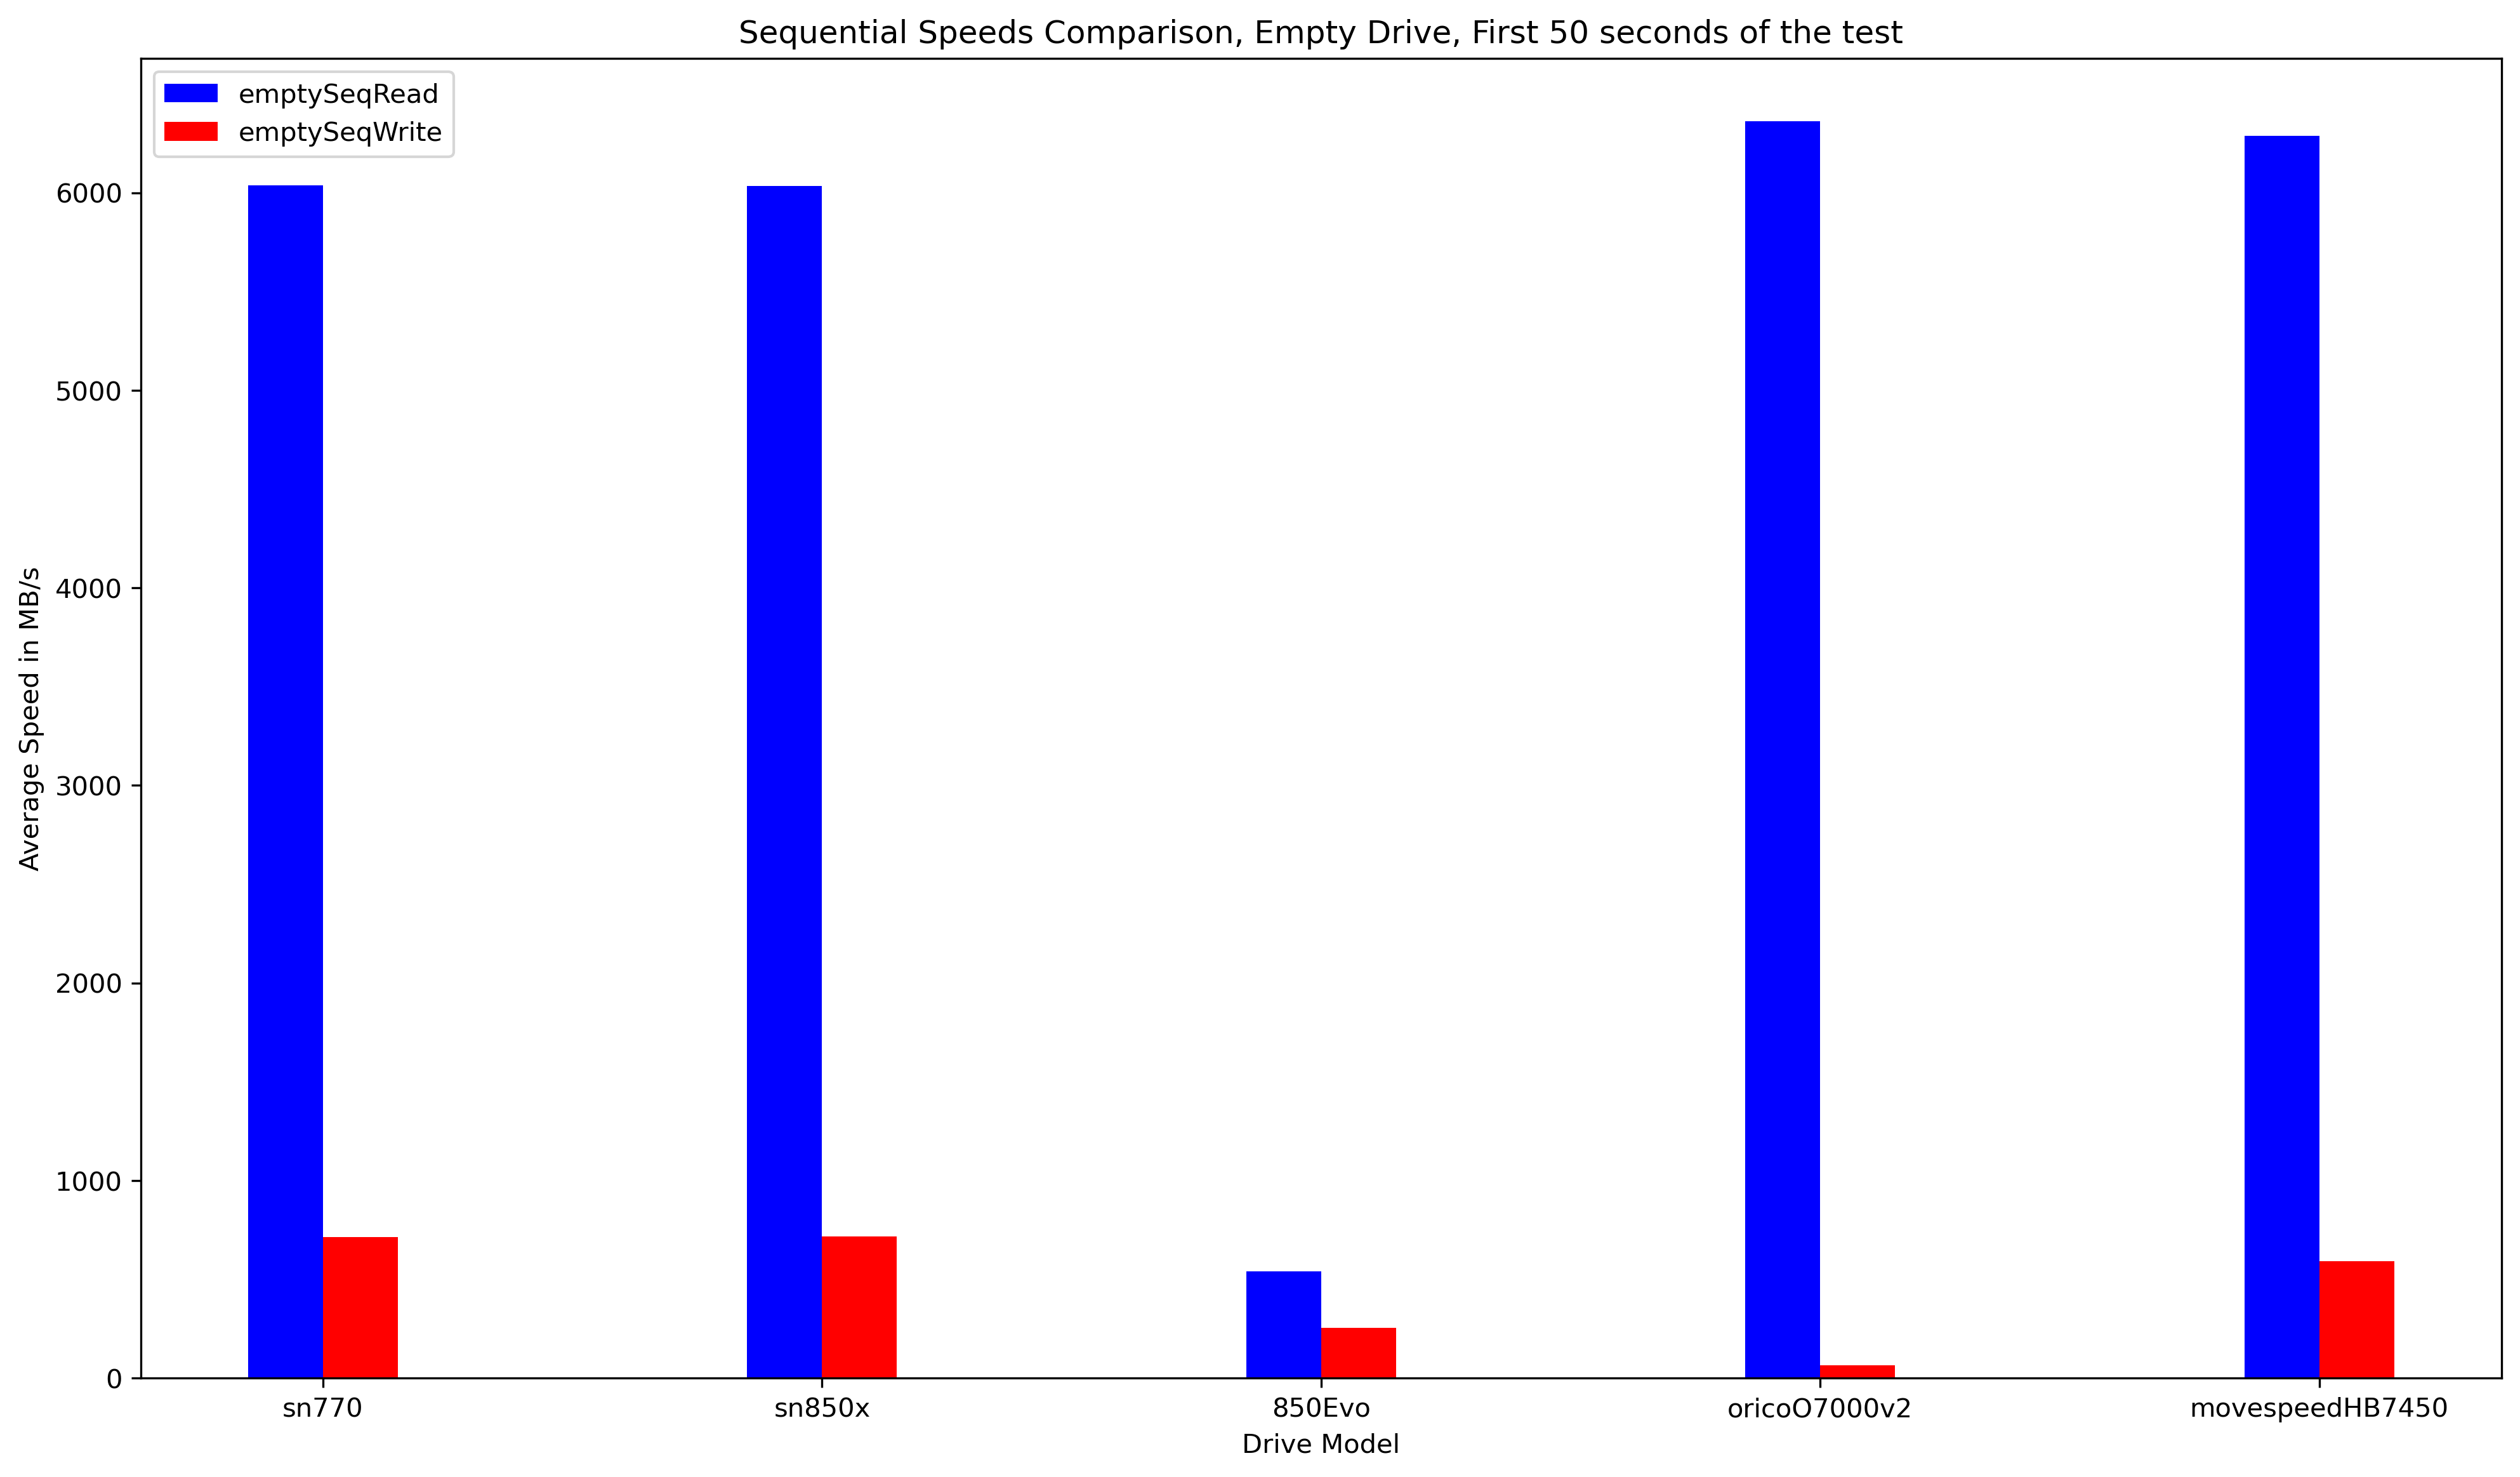

In [ ]:
selectedDrives = ['sn770', 'sn850x', '850Evo', 'oricoO7000v2', 'movespeedHB7450']
selectedTests = ["full", "emptySeqWrite"]

selectedResults = []

for i in selectedDrives:
    tempResults = []
    for j in selectedTests:
        testVal = perfTable[i][j]
        tempResults.append(testVal)
    selectedResults.append(tempResults)

print(selectedResults)

bar_width = 0.15
index = np.arange(len(selectedDrives))

plt.figure(figsize=(16, 9), dpi=300)
plt.bar(index, [result[0] for result in selectedResults], bar_width, color='blue', label=selectedTests[0])
plt.bar(index + bar_width, [result[1] for result in selectedResults], bar_width, color='red', label=selectedTests[1])

plt.xlabel('Drive Model')
plt.ylabel('Average Speed in MB/s')
plt.title('Sequential Speeds Comparison, Empty Drive, First 50 seconds of the test')
plt.xticks(index + bar_width / 2, selectedDrives)
plt.legend()

plt.show()


In [170]:

pd.DataFrame(fullEmptyDf,columns=drivesCompare)

drives = fullEmptyDf.columns
data = fullEmptyDf.loc['average']


plt.figure(figsize=(30,18),dpi=100)
plt.bar(drives,data)
plt.title("Full vs Empty drive speed(1 means the drive is the same speed full as empty), average of multiple tests")
plt.ylabel("Speed compared to full drive")
plt.rcParams.update({'font.size':18})


NameError: name 'fullEmptyDf' is not defined

Text(0.5, 0, 'Time')

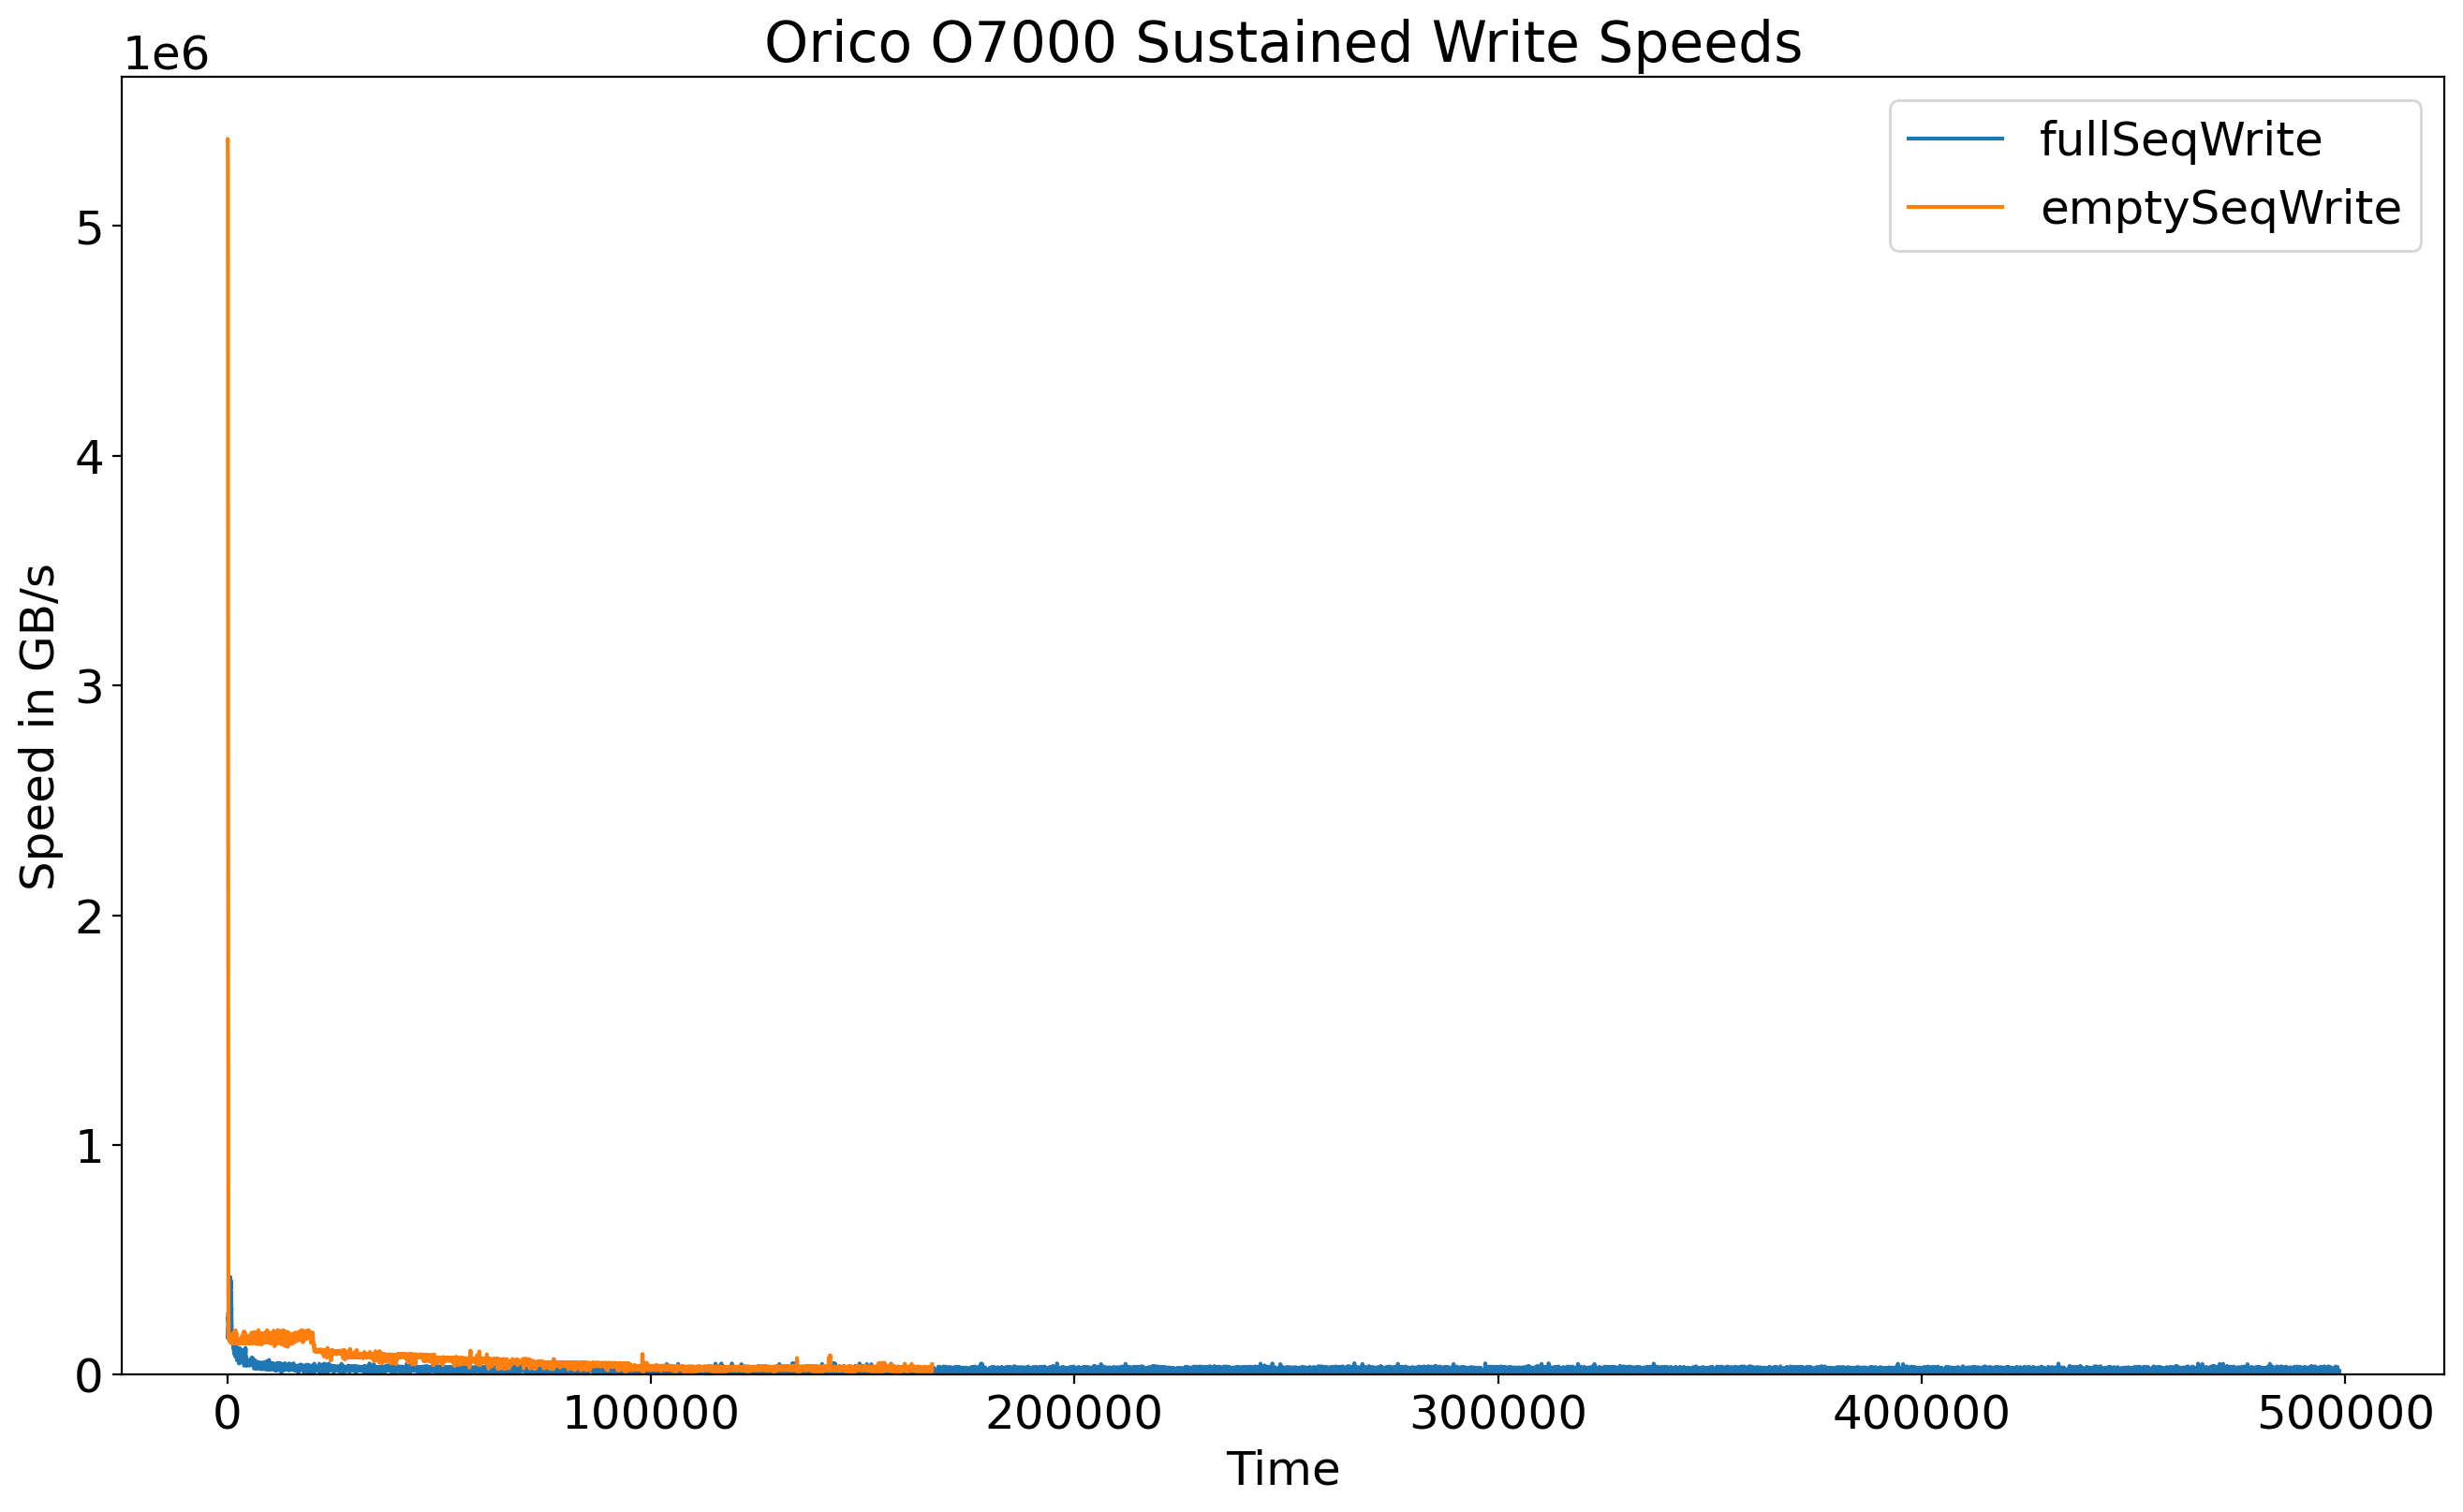

In [76]:
#Plotty McPlotface
#drives = ('movespeedHB7450','sn770','movespeedUSB20Gbit','movespeed5950x','moveSpeedSSDUSB3','850Evo5950x','JS600')


drive='oricoO7000v2'


#tests = driveDataDict['optane900p']

#tests = ['fullSeqWrite','emptySeqWrite','emptySeqRead','fullSeqRead']

tests = ['fullSeqWrite','emptySeqWrite']
#tests = ['fullSeqRead','emptySeqRead']

#tests = ['fullSeqWrite','emptySeqWrite','emptySeqRead','fullSeqRead']


plt.figure(dpi=200,figsize=(16,9))

for i in tests:
    #print(i)
    plt.plot(driveDataDict[drive][i]['rollSpd'],label=i)
plt.legend()
plt.title("Orico O7000 Sustained Write Speeds")
plt.ylim(0)
plt.ylabel("Speed in GB/s")
plt.xlabel("Time")

In [207]:
driveDataDict['oricoO7000v2']['fullSeqWrite']['speed'].head(100)


0      86463
1     112894
2      98435
3      89410
4      82940
       ...  
95    283989
96    342843
97    170666
98    207807
99    186455
Name: speed, Length: 100, dtype: int64

In [58]:
#data = (driveDataDict[drive]['fullSeqWrite'])
#data.to_csv("P:/temp/oriceFullWrite.csv")

perfTable.to_csv('P:/temp/driveSpeed.csv')
